In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install numpy scipy sklearn
!pip install jax
!pip install chex
!pip install attr
!pip install optax



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sklearn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
sys.path.append(r"C:\Users\zhossai3\Desktop\Fair_Imputation") 


import Utils
import CMI
import Inject_Missing_Values
import RR_imputer
import Sinkhorn_CMI
import SinkhornImputation
import SoftImpute



c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [3]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler

from Utils import *
from SoftImpute import softimpute, cv_softimpute
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import *
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from CMI import *

from Inject_Missing_Values import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

**Load Data**

In [4]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
groundTruth = pd.read_csv(r'C:\Users\zhossai3\Desktop\Fair_Imputation\Data\Student_performance_data _.csv', delimiter=',', header=0)


In [5]:
groundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 261.8 KB


Checking Number of unique values

In [6]:
groundTruth.nunique()

Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

In [7]:
print("Age",groundTruth['Age'].unique())
print("Gender",groundTruth['Gender'].unique())
print("Ethnicity",groundTruth['Ethnicity'].unique())
print("ParentalEducation",groundTruth['ParentalEducation'].unique())
print("StudyTimeWeekly",groundTruth['StudyTimeWeekly'].unique())
print('Absences',groundTruth['Absences'].unique())
print('Tutoring',groundTruth['Tutoring'].unique())
print('ParentalSupport',groundTruth['ParentalSupport'].unique())
print('Extracurricular',groundTruth['Extracurricular'].unique())
print('Sports',groundTruth['Sports'].unique())
print('Music',groundTruth['Music'].unique())
print('Volunteering',groundTruth['Volunteering'].unique())
print('GPA',groundTruth['GPA'].unique())
print('GradeClass',groundTruth['GradeClass'].unique())

Age [17 18 15 16]
Gender [1 0]
Ethnicity [0 2 1 3]
ParentalEducation [2 1 3 4 0]
StudyTimeWeekly [19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]
Absences [ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]
Tutoring [1 0]
ParentalSupport [2 1 3 4 0]
Extracurricular [0 1]
Sports [0 1]
Music [1 0]
Volunteering [0 1]
GPA [2.92919559 3.04291483 0.11260225 ... 1.14233288 1.80329676 2.14001388]
GradeClass [2 1 4 3 0]


In [8]:
groundTruth.head(5)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [9]:
scaler = StandardScaler()
groundTruth_scaled = pd.DataFrame(scaler.fit_transform(groundTruth), columns=groundTruth.columns)
print(groundTruth_scaled)


           Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0     0.472919  0.978492  -0.853391           0.253711         1.780336   
1     1.362944 -1.021981  -0.853391          -0.746087         0.997376   
2    -1.307132 -1.021981   1.091641           1.253509        -0.984045   
3     0.472919  0.978492  -0.853391           1.253509         0.045445   
4     0.472919  0.978492  -0.853391           0.253711        -0.902311   
...        ...       ...        ...                ...              ...   
2387  1.362944  0.978492  -0.853391           1.253509         0.160762   
2388  0.472919 -1.021981  -0.853391          -0.746087        -0.387285   
2389 -0.417106  0.978492  -0.853391           0.253711        -0.524895   
2390 -0.417106  0.978492   0.119125          -1.745885         0.467950   
2391 -0.417106  0.978492  -0.853391           0.253711         1.424008   

      Absences  Tutoring  ParentalSupport  Extracurricular    Sports  \
0    -0.890822  1.522371   

In [10]:
X= groundTruth_scaled.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth_scaled.iloc[:, -1]  # Selects all rows and only the last column

Converting GroudTruth to Tensor

In [11]:
groundTruth_tensor = torch.tensor((groundTruth_scaled.to_numpy()))

In [12]:
print(torch.unique(groundTruth_tensor[:,0])) 
print(torch.unique(groundTruth_tensor[:,1]))# coloumn 1 is sex where 1 is male and 0 is female.after scaling male is 0.6703 and female is -1.4919

tensor([-1.3071, -0.4171,  0.4729,  1.3629])
tensor([-1.0220,  0.9785])


In [13]:
print("Age",groundTruth_scaled['Age'].unique())
print("Gender",groundTruth_scaled['Gender'].unique())
print("Ethnicity",groundTruth_scaled['Ethnicity'].unique())
print("ParentalEducation",groundTruth_scaled['ParentalEducation'].unique())
print("StudyTimeWeekly",groundTruth_scaled['StudyTimeWeekly'].unique())
print('Absences',groundTruth_scaled['Absences'].unique())
print('Tutoring',groundTruth_scaled['Tutoring'].unique())
print('ParentalSupport',groundTruth_scaled['ParentalSupport'].unique())
print('Extracurricular',groundTruth_scaled['Extracurricular'].unique())
print('Sports',groundTruth_scaled['Sports'].unique())
print('Music',groundTruth_scaled['Music'].unique())
print('Volunteering',groundTruth_scaled['Volunteering'].unique())
print('GPA',groundTruth_scaled['GPA'].unique())
print('GradeClass',groundTruth_scaled['GradeClass'].unique())

Age [ 0.47291901  1.36294441 -1.30713178 -0.41710638]
Gender [ 0.97849211 -1.02198065]
Ethnicity [-0.85339088  1.09164102  0.11912507  2.06415697]
ParentalEducation [ 0.25371131 -0.7460868   1.25350942  2.25330753 -1.74588491]
StudyTimeWeekly [ 1.78033552  0.99737625 -0.98404514 ... -0.52489493  0.46794965
  1.42400846]
Absences [-0.89082237 -1.71769358  1.35354235 -0.06395116  0.29042222 -0.536449
  0.88104451 -1.59956912 -0.41832454  0.0541733   0.76292005 -0.65457345
  0.17229776  1.70791572 -1.48144467  1.23541789  0.64479559 -1.12707129
 -0.77269791 -0.30020008  1.4716668   0.99916897 -1.36332021 -0.18207562
 -1.00894683  1.58979126 -1.24519575  0.40854668  0.52667113  1.11729343]
Tutoring [ 1.52237132 -0.65686997]
ParentalSupport [-0.10874395 -0.99955054  0.78206265  1.67286924 -1.89035714]
Extracurricular [-0.78847633  1.2682689 ]
Sports [-0.66013204  1.51484845]
Music [ 2.01954358 -0.49516139]
Volunteering [-0.43186565  2.31553495]
GPA [ 1.11808631  1.24237446 -1.96027719 ... -

In [14]:
print("minimum: ",groundTruth_tensor.min())
print("maximum:",groundTruth_tensor.max())
print("mean: ",groundTruth_tensor.mean())
print("median: ", groundTruth_tensor.median())

minimum:  tensor(-2.4186)
maximum: tensor(2.3155)
mean:  tensor(3.2675e-17)
median:  tensor(-0.4319)


Determining the appropriate columns for bucketization along with their respective bucket sizes, and identifying the variables X, Y, and Z for Conditional Mutual Information (CMI) computation.

In [15]:
bucket_specs = {
    0:4,
    1:2,
    2: 4,   
    4: 5,  # studytime weekly
    5: 5, #absances
    6: 2, #Tutoring
    


}

# Define multiple attributes for X, Y, Z
X_cols = [0,1,2]  # Bucketized sensitive attributes (e.g., sex, race, age)
Y_cols = [13]     # Bucketized outcome-related attributes
Z_cols = [4,5,6]  

**CMI for GroundTruth**

In [16]:
#groundTruth_tensor = groundTruth_tensor.float()
groundTruth_tensor.requires_grad=True
cmi_groundTruth = CMI.c_m_i(groundTruth_tensor,bucket_specs,X_cols, Y_cols, Z_cols)
print(cmi_groundTruth)

H(X|Z): 2.087496464444402, H(Y|Z): 0.5607501711987561, H(X,Y|Z): 2.2009905722230956
tensor(0.4473, grad_fn=<ClampBackward1>)


Generating MCAR 25%, and added the target coloumn with the 25% missing MCAR data

In [ ]:
generator_mcar25 = Inject_Missing_Values()
miss_mcar25,index_mcar25 = generator_mcar25.MCAR(X,missing_rate=25)
print(type(miss_mcar25))
total_missing_percentage_mcar25= miss_mcar25.isnull().sum().sum() / miss_mcar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mcar25:.2f}%")

missing_percentage = (miss_mcar25.isnull().sum() / len(miss_mcar25)) * 100
print(missing_percentage)

miss_mcar25 = pd.concat([miss_mcar25, Y], axis=1) #adding the target coloumn

<class 'pandas.core.frame.DataFrame'>
Total Missing Percentage MAR25: 25.00%
Age                  24.205686
Gender               25.041806
Ethnicity            25.209030
ParentalEducation    25.710702
StudyTimeWeekly      26.045151
Absences             23.453177
Tutoring             25.376254
ParentalSupport      23.369565
Extracurricular      26.295987
Sports               26.337793
Music                24.122074
Volunteering         25.710702
GPA                  24.122074
dtype: float64


In [18]:
miss_mcar25_numpy = scale(miss_mcar25) #z-score scaling
#miss_mcar25_numpy = miss_mcar25.to_numpy()
miss_mcar25_tensor = torch.tensor(miss_mcar25_numpy) #converting to tensor

In [19]:
print(torch.unique(miss_mcar25_tensor[:,1]))

tensor([-1.0186,  0.9818,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     n

Applying Sinkhorn algorithm to MCAR 25% data

In [20]:
#only Sinkhorn
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
print(epsilon_mcar25)
mask_mcar25 = torch.isnan(miss_mcar25_tensor).double()


on_sk_imputer_mcar25 = SinkhornImputation(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mcar25, on_sk_maes25mcar, on_sk_rmses25mcar = on_sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mcar25_numpy = on_sk_imp_mcar25.detach().cpu().numpy()
on_sk_mae_mcar25 = MAE(on_sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
on_sk_rmse_mcar25 = RMSE(on_sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print("MAE:", on_sk_mae_mcar25)


0.5116787978985355


INFO:root:batchsize = 128, epsilon = 0.5117
INFO:root:Iteration 0:	 Loss: 3.3521	 Validation MAE: 0.8625	RMSE: 0.9972
INFO:root:Iteration 50:	 Loss: 3.3569	 Validation MAE: 0.8169	RMSE: 0.9864
INFO:root:Iteration 100:	 Loss: 3.4514	 Validation MAE: 0.7958	RMSE: 0.9809
INFO:root:Iteration 150:	 Loss: 3.0419	 Validation MAE: 0.7830	RMSE: 0.9791
INFO:root:Iteration 200:	 Loss: 3.2395	 Validation MAE: 0.7705	RMSE: 0.9759
INFO:root:Iteration 250:	 Loss: 3.2847	 Validation MAE: 0.7613	RMSE: 0.9739
INFO:root:Iteration 300:	 Loss: 3.0399	 Validation MAE: 0.7549	RMSE: 0.9739
INFO:root:Iteration 350:	 Loss: 3.1074	 Validation MAE: 0.7480	RMSE: 0.9734
INFO:root:Iteration 400:	 Loss: 3.2900	 Validation MAE: 0.7446	RMSE: 0.9742
INFO:root:Iteration 450:	 Loss: 3.2034	 Validation MAE: 0.7415	RMSE: 0.9757
INFO:root:Iteration 500:	 Loss: 3.3149	 Validation MAE: 0.7373	RMSE: 0.9754
INFO:root:Iteration 550:	 Loss: 3.3945	 Validation MAE: 0.7359	RMSE: 0.9774
INFO:root:Iteration 600:	 Loss: 3.1638	 Validat

MAE: tensor(0.7283, grad_fn=<DivBackward0>)


Calculating CMI after applying the Sinkhorn Imputation (only Sinkhorn algorithm)

In [21]:
#only CMI
on_cmi_missmcar25 = CMI.c_m_i(on_sk_imp_mcar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:", on_cmi_missmcar25)
print("MAE:",on_sk_mae_mcar25)

H(X|Z): 2.033735487080862, H(Y|Z): 0.4593042929045721, H(X,Y|Z): 2.0826162155968913
CMI: tensor(0.4104, grad_fn=<ClampBackward1>)
MAE: tensor(0.7283, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MCAR 25%

In [ ]:
#sinkhorn_CMI
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mcar25)
mask_mcar25  = torch.isnan(miss_mcar25_tensor).double()


sk_imputer_mcar25 = SinkhornImputation_CMI(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi = 500)
sk_imp_mcar25, sk_maes25mcar, sk_rmses25mcar,cmi_loss_mcar25,sinkhorn_loss_mcar25, lamda_cmi_mcar25 = sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mcar25_numpy = sk_imp_mcar25.detach().cpu().numpy()

sk_mae_mcar25 = MAE(sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
sk_rmse_mcar25 = RMSE(sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print("MAE:",sk_mae_mcar25)





0.5096139676061119


INFO:root:Iteration 0:	 Loss: 3.4341	 Validation MAE: 0.8629	RMSE: 0.9972
INFO:root:Iteration 50:	 Loss: 3.5224	 Validation MAE: 0.8191	RMSE: 1.0019
INFO:root:Iteration 100:	 Loss: 3.9125	 Validation MAE: 0.8014	RMSE: 0.9977
INFO:root:Iteration 150:	 Loss: 3.5823	 Validation MAE: 0.7893	RMSE: 0.9940
INFO:root:Iteration 200:	 Loss: 3.7261	 Validation MAE: 0.7813	RMSE: 0.9934
INFO:root:Iteration 250:	 Loss: 3.9796	 Validation MAE: 0.7757	RMSE: 0.9932
INFO:root:Iteration 300:	 Loss: 3.7976	 Validation MAE: 0.7728	RMSE: 0.9951
INFO:root:Iteration 350:	 Loss: 3.7265	 Validation MAE: 0.7692	RMSE: 0.9958
INFO:root:Iteration 400:	 Loss: 3.9778	 Validation MAE: 0.7677	RMSE: 0.9978
INFO:root:Iteration 450:	 Loss: 4.2253	 Validation MAE: 0.7654	RMSE: 0.9983
INFO:root:Iteration 500:	 Loss: 4.2401	 Validation MAE: 0.7633	RMSE: 0.9994
INFO:root:Iteration 550:	 Loss: 4.3290	 Validation MAE: 0.7621	RMSE: 1.0005
INFO:root:Iteration 600:	 Loss: 4.2884	 Validation MAE: 0.7599	RMSE: 1.0009
INFO:root:Itera

MAE: tensor(0.9223, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [92]:
#CMI
sk_cmi_mcar25 = CMI.c_m_i(sk_imp_mcar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",sk_cmi_mcar25)
print("MAE",sk_mae_mcar25)

H(X|Z): 1.3045636222508339, H(Y|Z): 0.3186723019654716, H(X,Y|Z): 1.6377501410059736
CMI tensor(0.0001, grad_fn=<ClampBackward1>)
MAE tensor(0.9223, grad_fn=<DivBackward0>)


In [99]:
print(mask_mcar25)

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 1., 1., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


Mean imputation, MAE and CMI

In [93]:

mean_imp_mcar25 = SimpleImputer().fit_transform(miss_mcar25_tensor)
mean_imp_mcar25_torch = torch.tensor(mean_imp_mcar25)
mean_mae_mcar25 = MAE(mean_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)

print("MAE",mean_mae_mcar25)

cmi_mean_mcar25 = CMI.c_m_i(mean_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_mean_mcar25)

MAE tensor(0.8620, grad_fn=<DivBackward0>)
H(X|Z): 1.982928716503233, H(Y|Z): 0.6211713255932247, H(X,Y|Z): 2.0702857025534467
CMI tensor(0.5338, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [94]:
ice_imp_mcar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mcar25_tensor)
ice_imp_mcar25_torch = torch.tensor(ice_imp_mcar25)
ice_mae_mcar25 = MAE(ice_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)
print("MAE",ice_mae_mcar25)

cmi_ice_mcar25 = CMI.c_m_i(ice_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_ice_mcar25)

MAE tensor(0.7618, grad_fn=<DivBackward0>)
H(X|Z): 1.793809365143038, H(Y|Z): 0.43575697025182514, H(X,Y|Z): 1.8317574873529594
CMI tensor(0.3978, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [95]:
cv_error_mcar25, grid_lambda_mcar25 = cv_softimpute(miss_mcar25_numpy, grid_len=15)
lbda_mcar25 = grid_lambda_mcar25[np.argmin(cv_error_mcar25)]
soft_imp_mcar25 = softimpute((miss_mcar25_numpy), lbda_mcar25)[1]
soft_imp_mcar25_torch = torch.tensor(soft_imp_mcar25)

soft_mae_mcar25 = MAE(soft_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)
print("MAE",soft_mae_mcar25)

cmi_soft_mcar25 = CMI.c_m_i(soft_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_soft_mcar25)

MAE tensor(0.7775, grad_fn=<DivBackward0>)
H(X|Z): 1.8716349668183492, H(Y|Z): 0.45164108619557997, H(X,Y|Z): 1.9170916848035597
CMI tensor(0.4062, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Iteration

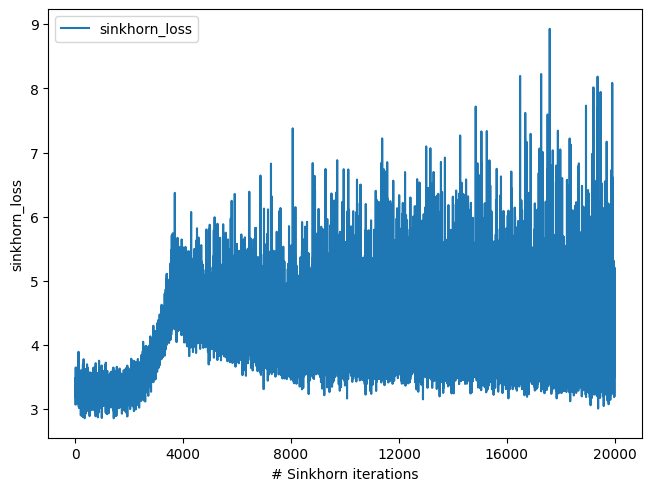

In [96]:
sinkhorn_loss_mcar25 = torch.tensor(sinkhorn_loss_mcar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mcar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

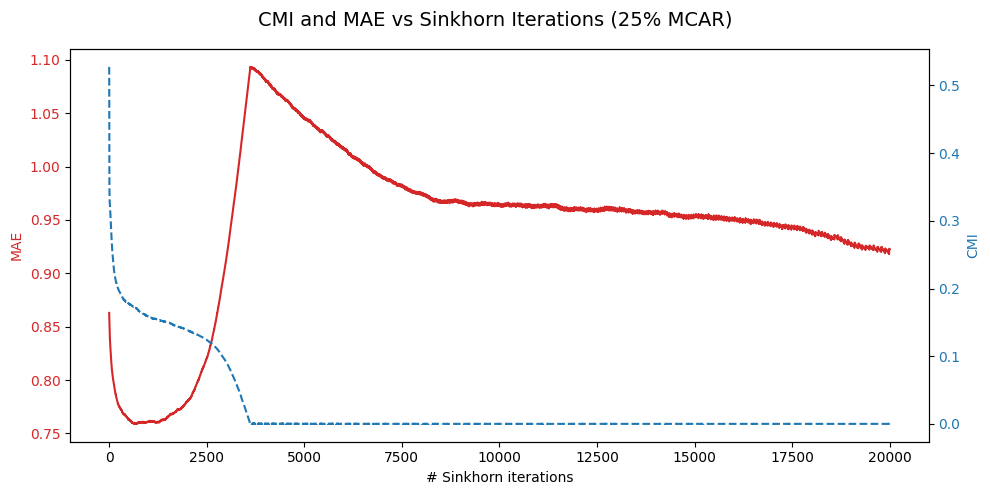

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mcar25
mae_array = sk_maes25mcar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MCAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

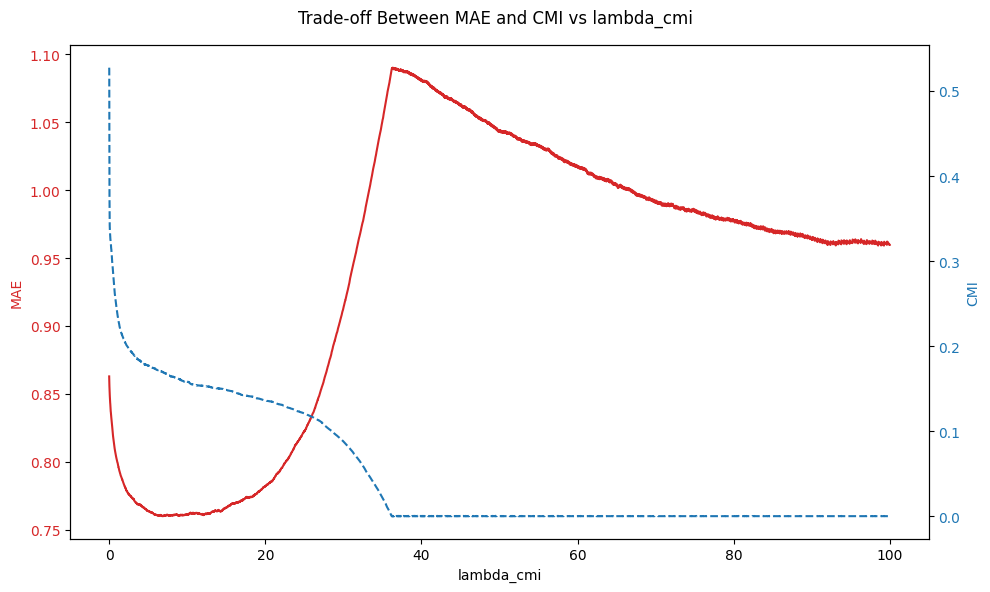

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mcar25 # list of length 2000 from your model
mae_history = sk_maes25mcar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mcar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


In [30]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert to arrays
mae_array_mcar25 = np.array(sk_maes25mcar)
cmi_array_mcar25 = np.array(cmi_loss_mcar25)
lambda_array_mcar25 = np.array(lamda_cmi_mcar25)

# OPTIONAL: Skip very low lambda values (e.g., lambda = 0)
min_index = 10  # or 0 if you want to include everything

# ---- Option 1: Visual Match (Rescale CMI to MAE's range) ----
min_mae_mcar25, max_mae_mcar25 = mae_array_mcar25.min(), mae_array_mcar25.max()
min_cmi_mcar25, max_cmi_mcar25 = cmi_array_mcar25.min(), cmi_array_mcar25.max()

# Rescale CMI to the MAE axis range
cmi_rescaled_mcar25 = (cmi_array_mcar25 - min_cmi_mcar25) / (max_cmi_mcar25 - min_cmi_mcar25) * (max_mae_mcar25 - min_mae_mcar25) + min_mae_mcar25

# Compute difference between MAE and rescaled CMI
diff_mcar25 = np.abs(mae_array_mcar25[min_index:] - cmi_rescaled_mcar25[min_index:])
intersection_idx_mcar25 = np.argmin(diff_mcar25) + min_index  # add offset

# ---- Extract Values at Intersection ----
lambda_intersection_mcra25 = lambda_array_mcar25[intersection_idx_mcar25]
mae_val_mcar25 = mae_array_mcar25[intersection_idx_mcar25]
cmi_val_mcar25 = cmi_array_mcar25[intersection_idx_mcar25]

# ---- Display Result ----
print("Estimated Visual Intersection Point MCAR25:")
print(f"  lambda_cmi_mcar25 = {lambda_intersection_mcra25:.4f}")
print(f"  MAE_mcar25        = {mae_val_mcar25:.4f}")
print(f"  CMI_mcar25        = {cmi_val_mcar25:.4f}")


Estimated Visual Intersection Point MCAR25:
  lambda_cmi_mcar25 = 25.8800
  MAE_mcar25        = 0.8328
  CMI_mcar25        = 0.1170


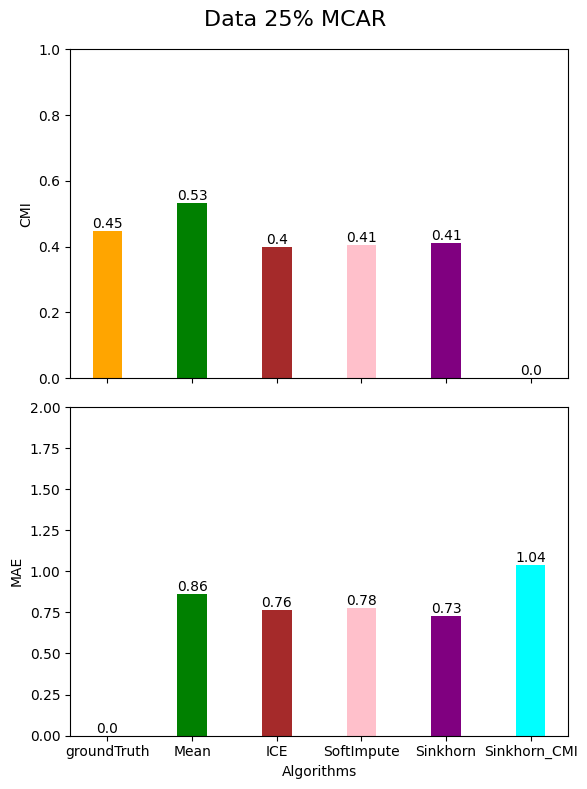

In [31]:

# Define values and categories
values_cmi_mcar25 = [cmi_groundTruth.detach(),cmi_mean_mcar25.detach(),cmi_ice_mcar25.detach(),cmi_soft_mcar25.detach(),on_cmi_missmcar25.detach(),sk_cmi_mcar25.detach()]
values_maes_mcar25 = [0.0,mean_mae_mcar25.detach(),ice_mae_mcar25.detach(), soft_mae_mcar25.detach(),on_sk_mae_mcar25.detach(),sk_mae_mcar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MCAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mcar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mcar25, color=colors, width=bar_width)
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


**25% MAR**

In [ ]:
mean_gpa = groundTruth_scaled["GPA"].mean()

dependencies_mar = {"ParentalEducation": {
        "influencers": ["Ethnicity"],
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Ethnicity"]<1 else 0.1
    },
    "ParentalSupport": {
        "influencers": ["Gender"],
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"]==0.97849211 else 0.1 
    },
    "StudyTimeWeekly": {
        "influencers": ["GPA"],
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["GPA"]<=mean_gpa else 0.1 
    },
    "Absences": {
        "influencers": ["Tutoring"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Tutoring"]==1.52237132 else 0.1
    },
    "Extracurricular": {
        "influencers": ["Gender"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"]==0.97849211 else 0.1 
    },
    
    "Volunteering": {
        "influencers": ["Age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Age"]<=0.47 else 0.1
    },

    "Sports": {
        "influencers": ["Gender"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"]==0.97849211 else 0.1 
    },


     "Music": {
        "influencers": ["Ethnicity"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Ethnicity"]<=1.09164102 else 0.1 
    }
     
}


Generating MAR 25%, and added the target coloumn with the 25% missing MAR data

In [ ]:
generator_mar25 = Inject_Missing_Values()
miss_mar25,index_mar25 = generator_mar25.MAR(X,dependencies_mar,missing_rate=25)
miss_mar25 = pd.concat([miss_mar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mar25 = miss_mar25.isnull().sum().sum() / miss_mar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

Total Missing Percentage MAR25: 23.21%


In [34]:
missing_percentage = (miss_mar25.isnull().sum() / len(miss_mar25)) * 100
print(missing_percentage)

Age                   0.000000
Gender                0.000000
Ethnicity             0.000000
ParentalEducation    62.541806
StudyTimeWeekly      51.964883
Absences             25.250836
Tutoring              0.000000
ParentalSupport      25.000000
Extracurricular      25.585284
Sports               23.954849
Music                60.284281
Volunteering         50.418060
GPA                   0.000000
GradeClass            0.000000
dtype: float64


In [35]:
miss_mar25_numpy = miss_mar25.to_numpy()
miss_mar25_tensor = torch.tensor(miss_mar25_numpy) #converting to tensor

In [36]:
print(miss_mar25.head(5))

        Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0  0.472919  0.978492  -0.853391                NaN         1.780336   
1  1.362944 -1.021981  -0.853391                NaN         0.997376   
2 -1.307132 -1.021981   1.091641                NaN        -0.984045   
3  0.472919  0.978492  -0.853391                NaN              NaN   
4  0.472919  0.978492  -0.853391                NaN              NaN   

   Absences  Tutoring  ParentalSupport  Extracurricular    Sports     Music  \
0 -0.890822  1.522371        -0.108744        -0.788476 -0.660132       NaN   
1 -1.717694 -0.656870        -0.999551        -0.788476       NaN       NaN   
2  1.353542 -0.656870        -0.108744              NaN -0.660132 -0.495161   
3 -0.063951 -0.656870         0.782063         1.268269 -0.660132       NaN   
4  0.290422  1.522371         0.782063              NaN -0.660132 -0.495161   

   Volunteering       GPA  GradeClass  
0           NaN  1.118086   -0.797387  
1     -0.431

Applying Sinkhorn algorithm to MAR 25% data

In [37]:
#only Sinkhorn
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
print(epsilon_mar25)
mask_mar25= torch.isnan(miss_mar25_tensor).double()


on_sk_imputer_mar25 = SinkhornImputation(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mar25, on_sk_maes25mar, on_sk_rmses25mar = on_sk_imputer_mar25.fit_transform(miss_mar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mar25_numpy = on_sk_imp_mar25.detach().cpu().numpy()
on_sk_mae_mar25 = MAE(on_sk_imp_mar25,groundTruth_tensor , mask_mar25)
on_sk_rmse_mar25 = RMSE(on_sk_imp_mar25, groundTruth_tensor, mask_mar25)
print("MAE:",on_sk_mae_mar25)

INFO:root:batchsize = 128, epsilon = 0.5106


0.5106150588115757


INFO:root:Iteration 0:	 Loss: 3.0690	 Validation MAE: 0.8357	RMSE: 1.0067
INFO:root:Iteration 50:	 Loss: 2.8678	 Validation MAE: 0.7954	RMSE: 0.9997
INFO:root:Iteration 100:	 Loss: 3.0367	 Validation MAE: 0.7772	RMSE: 0.9985
INFO:root:Iteration 150:	 Loss: 3.0543	 Validation MAE: 0.7655	RMSE: 0.9986
INFO:root:Iteration 200:	 Loss: 2.8105	 Validation MAE: 0.7545	RMSE: 0.9973
INFO:root:Iteration 250:	 Loss: 2.9594	 Validation MAE: 0.7461	RMSE: 0.9973
INFO:root:Iteration 300:	 Loss: 2.7652	 Validation MAE: 0.7395	RMSE: 0.9981
INFO:root:Iteration 350:	 Loss: 2.9963	 Validation MAE: 0.7340	RMSE: 0.9985
INFO:root:Iteration 400:	 Loss: 2.7236	 Validation MAE: 0.7290	RMSE: 0.9978
INFO:root:Iteration 450:	 Loss: 2.5816	 Validation MAE: 0.7257	RMSE: 0.9986
INFO:root:Iteration 500:	 Loss: 2.8948	 Validation MAE: 0.7228	RMSE: 1.0002
INFO:root:Iteration 550:	 Loss: 2.8146	 Validation MAE: 0.7191	RMSE: 0.9993
INFO:root:Iteration 600:	 Loss: 2.9736	 Validation MAE: 0.7177	RMSE: 1.0022
INFO:root:Itera

MAE: tensor(0.7090, grad_fn=<DivBackward0>)


CMI for Sinkhorn Imputation

In [38]:
#only CMI
on_cmi_missmar25 = CMI.c_m_i(on_sk_imp_mar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",on_cmi_missmar25)
print("MAE:",on_sk_mae_mar25)

H(X|Z): 2.1636866295423642, H(Y|Z): 0.4950480026708144, H(X,Y|Z): 2.293918556877305
CMI: tensor(0.3648, grad_fn=<ClampBackward1>)
MAE: tensor(0.7090, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MAR 25% data

In [39]:
#sinkhorn_CMI
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mar25)
mask_mar25 = torch.isnan(miss_mar25_tensor).double()



sk_imputer_mar25 = SinkhornImputation_CMI(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi = 500)
sk_imp_mar25, sk_maes25mar, sk_rmses25mar,cmi_loss_mar25,sinkhorn_loss_mar25,lamda_cmi_mar25 = sk_imputer_mar25.fit_transform(miss_mar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mar25_numpy = sk_imp_mar25.detach().cpu().numpy()

sk_mae_mar25 = MAE(sk_imp_mar25,groundTruth_tensor , mask_mar25)
sk_rmse_mar25 = RMSE(sk_imp_mar25, groundTruth_tensor, mask_mar25)
print("MAE:",sk_mae_mar25)


0.5118397547434241


INFO:root:Iteration 0:	 Loss: 3.2476	 Validation MAE: 0.8352	RMSE: 1.0066
INFO:root:Iteration 50:	 Loss: 3.3470	 Validation MAE: 0.7935	RMSE: 1.0000
INFO:root:Iteration 100:	 Loss: 3.3733	 Validation MAE: 0.7774	RMSE: 1.0013
INFO:root:Iteration 150:	 Loss: 3.3799	 Validation MAE: 0.7695	RMSE: 1.0049
INFO:root:Iteration 200:	 Loss: 3.2756	 Validation MAE: 0.7621	RMSE: 1.0072
INFO:root:Iteration 250:	 Loss: 3.4027	 Validation MAE: 0.7579	RMSE: 1.0100
INFO:root:Iteration 300:	 Loss: 3.5517	 Validation MAE: 0.7552	RMSE: 1.0135
INFO:root:Iteration 350:	 Loss: 3.6622	 Validation MAE: 0.7518	RMSE: 1.0154
INFO:root:Iteration 400:	 Loss: 3.7593	 Validation MAE: 0.7489	RMSE: 1.0175
INFO:root:Iteration 450:	 Loss: 4.1817	 Validation MAE: 0.7474	RMSE: 1.0202
INFO:root:Iteration 500:	 Loss: 4.0081	 Validation MAE: 0.7458	RMSE: 1.0215
INFO:root:Iteration 550:	 Loss: 3.9477	 Validation MAE: 0.7443	RMSE: 1.0220
INFO:root:Iteration 600:	 Loss: 4.0394	 Validation MAE: 0.7444	RMSE: 1.0253
INFO:root:Itera

MAE: tensor(0.7388, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [40]:
#CMI
cmi_mar25 = CMI.c_m_i(sk_imp_mar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mar25)
print("MAE:",sk_mae_mar25)

H(X|Z): 1.912381640889408, H(Y|Z): 0.4198363470231321, H(X,Y|Z): 2.1463490436012
CMI: tensor(0.1859, grad_fn=<ClampBackward1>)
MAE: tensor(0.7388, grad_fn=<DivBackward0>)


Mean Imputation, CMI and MAE

In [41]:

mean_imp_mar25 = SimpleImputer().fit_transform(miss_mar25_tensor)
mean_imp_mar25_torch = torch.tensor(mean_imp_mar25)
mean_mae_mar25 = MAE(mean_imp_mar25_torch, groundTruth_tensor , mask_mar25)

print("MAE:",mean_mae_mar25)

cmi_mean_mar25 = CMI.c_m_i(mean_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mean_mar25)

MAE: tensor(0.8341, grad_fn=<DivBackward0>)
H(X|Z): 2.29329859821216, H(Y|Z): 0.6850989226440616, H(X,Y|Z): 2.5416972184707616
CMI: tensor(0.4367, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [42]:
ice_imp_mar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mar25_tensor)
ice_imp_mar25_torch = torch.tensor(ice_imp_mar25)
ice_mae_mar25 = MAE(ice_imp_mar25_torch, groundTruth_tensor , mask_mar25)
print("MAE:",ice_mae_mar25)

cmi_ice_mar25 = CMI.c_m_i(ice_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_ice_mar25)

MAE: tensor(0.8017, grad_fn=<DivBackward0>)
H(X|Z): 2.045467589675572, H(Y|Z): 0.5108861069608785, H(X,Y|Z): 2.1553858044805345
CMI: tensor(0.4010, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [43]:
cv_error_mar25, grid_lambda_mar25 = cv_softimpute(miss_mar25_numpy, grid_len=15)
lbda_mar25 = grid_lambda_mar25[np.argmin(cv_error_mar25)]
soft_imp_mar25 = softimpute((miss_mar25_numpy), lbda_mar25)[1]
soft_imp_mar25_torch = torch.tensor(soft_imp_mar25)

soft_mae_mar25 = MAE(soft_imp_mar25_torch, groundTruth_tensor , mask_mar25)
print("MAE:",soft_mae_mar25)

cmi_soft_mar25 = CMI.c_m_i(soft_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_soft_mar25)

MAE: tensor(0.7760, grad_fn=<DivBackward0>)
H(X|Z): 2.2294182272411263, H(Y|Z): 0.49041370613535484, H(X,Y|Z): 2.3666445863840675
CMI: tensor(0.3532, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Iterations

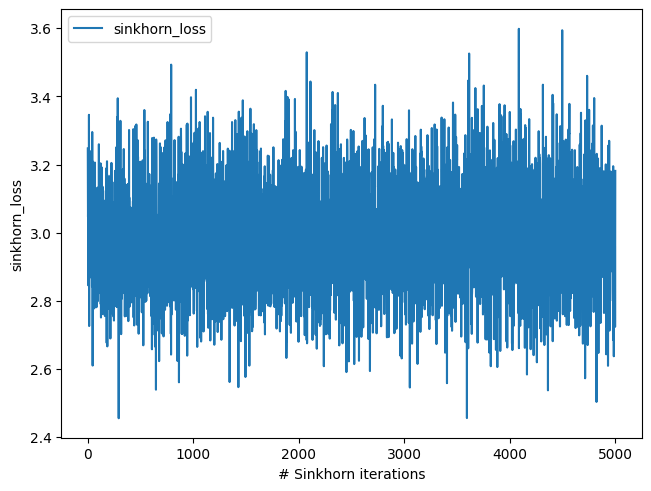

In [44]:
sinkhorn_loss_mar25 = torch.tensor(sinkhorn_loss_mar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

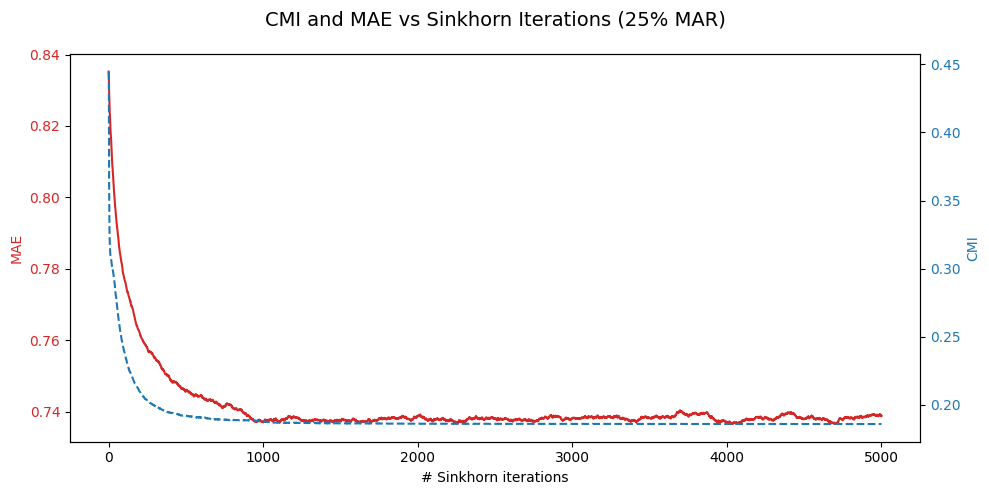

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mar25
mae_array = sk_maes25mar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

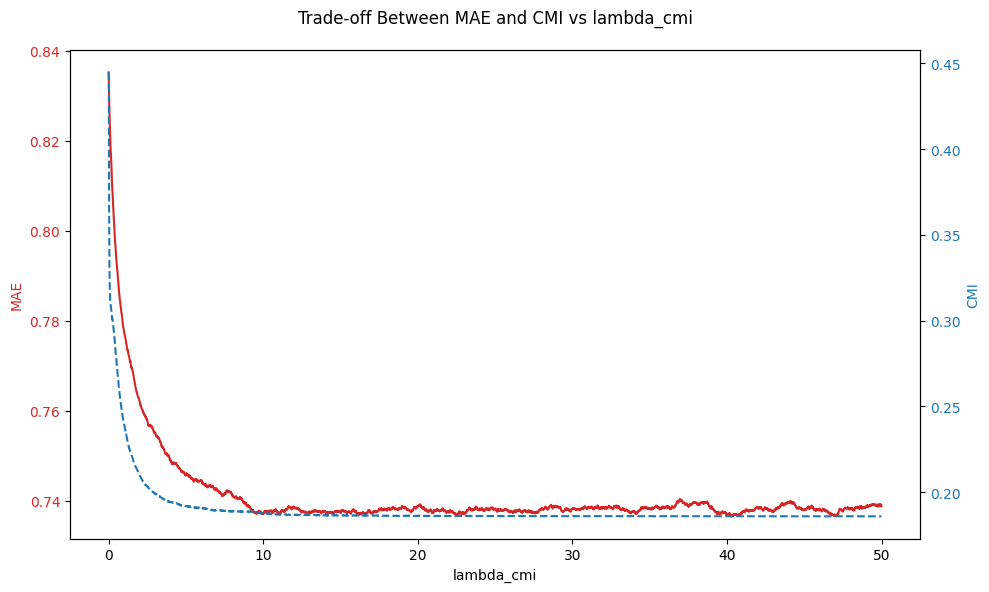

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mar25 # list of length 2000 from your model
mae_history = sk_maes25mar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


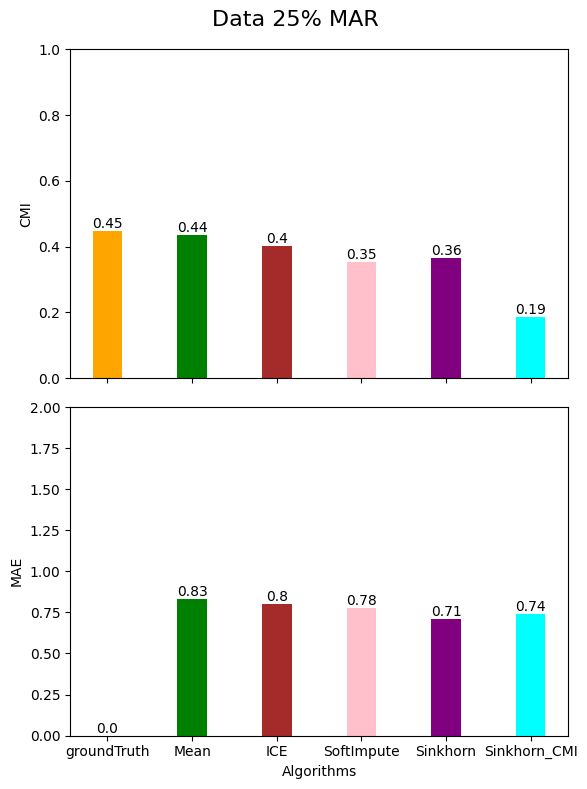

In [47]:

# Define values and categories
values_cmi_mar25 = [cmi_groundTruth.detach(),cmi_mean_mar25.detach(),cmi_ice_mar25.detach(),cmi_soft_mar25.detach(),on_cmi_missmar25.detach(),cmi_mar25.detach()]
values_maes_mar25 = [0.0,mean_mae_mar25.detach(),ice_mae_mar25.detach(), soft_mae_mar25.detach(),on_sk_mae_mar25.detach(),sk_mae_mar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mar25, color=colors, width=bar_width)
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show() #display 


**25% MNAR**

In [ ]:
mean_ParentalEducation = groundTruth_scaled["ParentalEducation"].mean()
median_ParentalSupport = groundTruth_scaled["ParentalSupport"].median()
mean_StudyTimeWeekly = groundTruth_scaled["StudyTimeWeekly"].median()
mean_Absences = groundTruth_scaled["Absences"].median()
median_gpa = groundTruth_scaled["GPA"].median()






dependencies_mnar = {"ParentalEducation": {
       
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["ParentalEducation"] < mean_ParentalEducation else 0.1
    },
    "ParentalSupport": {
        
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["ParentalSupport"]>= median_ParentalSupport else 0.1 
    },
    "StudyTimeWeekly": {
        
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["StudyTimeWeekly"] <= mean_StudyTimeWeekly  else 0.1 
    },
    "Absences": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Absences"] >= mean_Absences else 0.1
    },
    "Extracurricular": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Extracurricular"] == 1.2682689 else 0.1 
    },
    
    "Volunteering": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Volunteering"] == 2.31553495 else 0.1
    },

    "Sports": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Sports"] == 1.51484845 else 0.1 
    },


    "Music": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Music"] == 2.01954358 else 0.1 
    },
    "Age": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Age"] < 0.47 else 0.1 
    },
    "Gender": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Gender"] == 0.97849211 else 0.1 
    },
    "GPA": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["GPA"] >= median_gpa else 0.1 
    },

    "Ethnicity": {
      
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["Ethnicity"] < 1.09164102 else 0.1 
    }
     



}



Generating MNAR 25%, and added the target coloumn with the 25% missing MNAR data

In [ ]:
generator_mnar25 = Inject_Missing_Values()
miss_mnar25,index_mnar25 = generator_mnar25.MNAR(X,dependencies_mnar,missing_rate=25)

miss_mnar25 = pd.concat([miss_mnar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mnar25 = miss_mnar25.isnull().sum().sum() / miss_mnar25.size * 100
print(f"Total Missing Percentage MNAR25: {total_missing_percentage_mnar25:.2f}%")

Total Missing Percentage MNAR25: 23.21%


In [50]:
missing_percentage = (miss_mnar25.isnull().sum() / len(miss_mnar25)) * 100
print(missing_percentage)

Age                  34.615385
Gender               12.876254
Ethnicity            41.053512
ParentalEducation    31.061873
StudyTimeWeekly      34.740803
Absences             35.535117
Tutoring              0.000000
ParentalSupport      42.725753
Extracurricular      14.339465
Sports               14.339465
Music                15.217391
Volunteering         15.008361
GPA                  33.486622
GradeClass            0.000000
dtype: float64


In [51]:
miss_mnar25_numpy = miss_mnar25.to_numpy()
miss_mnar25_tensor = torch.tensor(miss_mnar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MNAR 25% data

In [52]:
#only Sinkhorn
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
print(epsilon_mnar25)
mask_mnar25= torch.isnan(miss_mnar25_tensor).double()


on_sk_imputer_mnar25 = SinkhornImputation(eps=epsilon_mnar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mnar25, on_sk_maes25mnar, on_sk_rmses25mnar = on_sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mnar25_numpy = on_sk_imp_mnar25.detach().cpu().numpy()
on_sk_mae_mnar25 = MAE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
on_sk_rmse_mnar25 = RMSE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print("MAE:",on_sk_mae_mnar25)

INFO:root:batchsize = 128, epsilon = 0.5111


0.5110592172953269


INFO:root:Iteration 0:	 Loss: 3.3866	 Validation MAE: 0.9532	RMSE: 1.0990
INFO:root:Iteration 50:	 Loss: 3.2761	 Validation MAE: 0.9241	RMSE: 1.0878
INFO:root:Iteration 100:	 Loss: 2.8758	 Validation MAE: 0.9081	RMSE: 1.0798
INFO:root:Iteration 150:	 Loss: 3.1091	 Validation MAE: 0.8958	RMSE: 1.0729
INFO:root:Iteration 200:	 Loss: 3.0228	 Validation MAE: 0.8851	RMSE: 1.0667
INFO:root:Iteration 250:	 Loss: 3.0724	 Validation MAE: 0.8765	RMSE: 1.0619
INFO:root:Iteration 300:	 Loss: 3.0976	 Validation MAE: 0.8698	RMSE: 1.0591
INFO:root:Iteration 350:	 Loss: 3.1265	 Validation MAE: 0.8645	RMSE: 1.0570
INFO:root:Iteration 400:	 Loss: 2.9837	 Validation MAE: 0.8593	RMSE: 1.0540
INFO:root:Iteration 450:	 Loss: 2.9715	 Validation MAE: 0.8555	RMSE: 1.0526
INFO:root:Iteration 500:	 Loss: 2.9776	 Validation MAE: 0.8512	RMSE: 1.0507
INFO:root:Iteration 550:	 Loss: 2.9465	 Validation MAE: 0.8468	RMSE: 1.0480
INFO:root:Iteration 600:	 Loss: 3.1034	 Validation MAE: 0.8438	RMSE: 1.0473
INFO:root:Itera

MAE: tensor(0.8197, grad_fn=<DivBackward0>)


CMI for Sinkhorn Imputation

In [53]:
#only CMI
on_cmi_missmnar25 = CMI.c_m_i(on_sk_imp_mnar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",on_cmi_missmnar25)
print("MAE:",on_sk_mae_mnar25)

H(X|Z): 2.275997314013555, H(Y|Z): 0.5140285848951143, H(X,Y|Z): 2.360804282752235
CMI: tensor(0.4292, grad_fn=<ClampBackward1>)
MAE: tensor(0.8197, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MNAR 25% data

In [54]:
#sinkhorn_CMI
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mnar25)
mask_mnar25 = torch.isnan(miss_mnar25_tensor).double()


sk_imputer_mnar25 = SinkhornImputation_CMI(eps = epsilon_mnar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi=500)
sk_imp_mnar25, sk_maes25mnar, sk_rmses25mnar,cmi_loss_mnar25, sinkhorn_loss_mnar25, lamda_cmi_mnar25 = sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mnar25_numpy = sk_imp_mnar25.detach().cpu().numpy()

sk_mae_mnar25 = MAE(sk_imp_mnar25, groundTruth_tensor , mask_mnar25)
sk_rmse_mnar25 = RMSE(sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print("MAE:",sk_mae_mnar25)





0.5102905389499468


INFO:root:Iteration 0:	 Loss: 3.4079	 Validation MAE: 0.9523	RMSE: 1.0985
INFO:root:Iteration 50:	 Loss: 3.5492	 Validation MAE: 0.9235	RMSE: 1.0986
INFO:root:Iteration 100:	 Loss: 3.5239	 Validation MAE: 0.9038	RMSE: 1.0870
INFO:root:Iteration 150:	 Loss: 3.4082	 Validation MAE: 0.8925	RMSE: 1.0816
INFO:root:Iteration 200:	 Loss: 3.7625	 Validation MAE: 0.8847	RMSE: 1.0781
INFO:root:Iteration 250:	 Loss: 3.5949	 Validation MAE: 0.8781	RMSE: 1.0748
INFO:root:Iteration 300:	 Loss: 3.7567	 Validation MAE: 0.8732	RMSE: 1.0725
INFO:root:Iteration 350:	 Loss: 3.8423	 Validation MAE: 0.8691	RMSE: 1.0711
INFO:root:Iteration 400:	 Loss: 4.0378	 Validation MAE: 0.8646	RMSE: 1.0691
INFO:root:Iteration 450:	 Loss: 4.0555	 Validation MAE: 0.8624	RMSE: 1.0703
INFO:root:Iteration 500:	 Loss: 4.0789	 Validation MAE: 0.8607	RMSE: 1.0706
INFO:root:Iteration 550:	 Loss: 4.0154	 Validation MAE: 0.8587	RMSE: 1.0707
INFO:root:Iteration 600:	 Loss: 4.1340	 Validation MAE: 0.8576	RMSE: 1.0711
INFO:root:Itera

MAE: tensor(1.1369, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [55]:
#CMI
cmi_mnar25 = CMI.c_m_i(sk_imp_mnar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mnar25)
print("MAE:",sk_mae_mnar25)

H(X|Z): 1.7256195264883658, H(Y|Z): 0.4050742433538854, H(X,Y|Z): 2.132060133017945
CMI: tensor(0.0001, grad_fn=<ClampBackward1>)
MAE: tensor(1.1369, grad_fn=<DivBackward0>)


Mean Imputation, CMI and MAE

In [56]:

mean_imp_mnar25 = SimpleImputer().fit_transform(miss_mnar25_tensor)
mean_imp_mnar25_torch = torch.tensor(mean_imp_mnar25)
mean_mae_mnar25 = MAE(mean_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)

print("MAE:",mean_mae_mnar25)

cmi_mean_mnar25 = CMI.c_m_i(mean_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mean_mnar25)

MAE: tensor(0.9517, grad_fn=<DivBackward0>)
H(X|Z): 2.352794904174891, H(Y|Z): 0.7288058357113272, H(X,Y|Z): 2.609037907642155
CMI: tensor(0.4726, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [57]:
ice_imp_mnar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mnar25_tensor)
ice_imp_mnar25_torch = torch.tensor(ice_imp_mnar25)
ice_mae_mnar25 = MAE(ice_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)
print("MAE:",ice_mae_mnar25)

cmi_ice_mnar25 = CMI.c_m_i(ice_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_ice_mnar25)

MAE: tensor(0.8309, grad_fn=<DivBackward0>)
H(X|Z): 2.217170194169288, H(Y|Z): 0.5347044498723044, H(X,Y|Z): 2.2988321081543894
CMI: tensor(0.4530, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [58]:
cv_error_mnar25, grid_lambda_mnar25 = cv_softimpute(miss_mnar25_numpy, grid_len=15)
lbda_mnar25 = grid_lambda_mnar25[np.argmin(cv_error_mnar25)]
soft_imp_mnar25 = softimpute((miss_mnar25_numpy), lbda_mnar25)[1]
soft_imp_mnar25_torch = torch.tensor(soft_imp_mnar25)

soft_mae_mnar25 = MAE(soft_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)
print("MAE:",soft_mae_mnar25)

cmi_soft_mnar25 = CMI.c_m_i(soft_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_soft_mnar25)

MAE: tensor(0.7294, grad_fn=<DivBackward0>)
H(X|Z): 2.2615185675992606, H(Y|Z): 0.521208478015927, H(X,Y|Z): 2.366549453710155
CMI: tensor(0.4162, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Interations

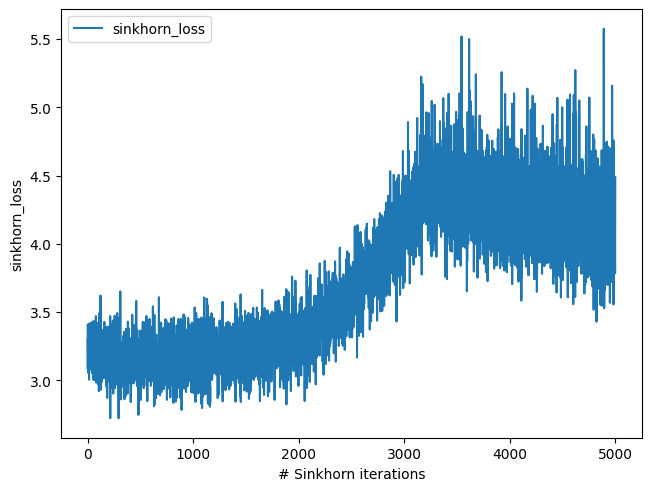

In [59]:
sinkhorn_loss_mnar25 = torch.tensor(sinkhorn_loss_mnar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mnar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mnar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

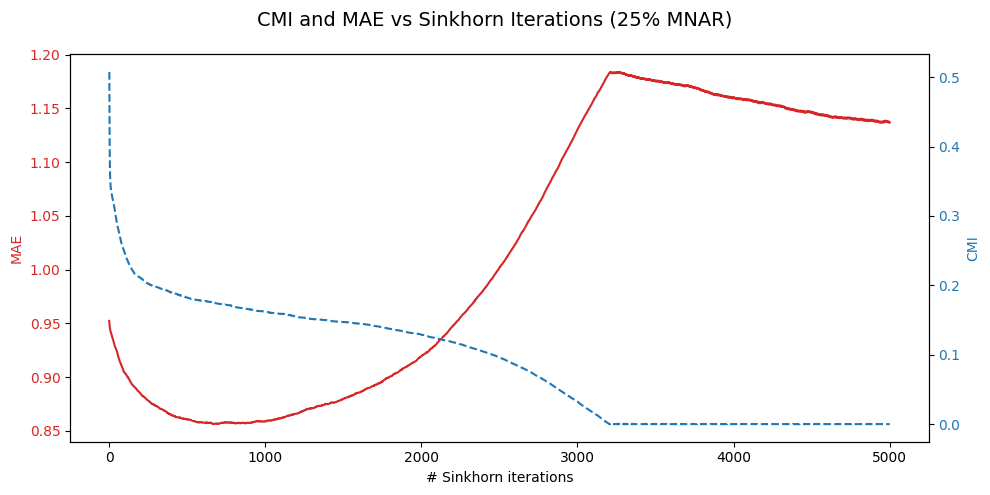

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mnar25
mae_array = sk_maes25mnar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MNAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

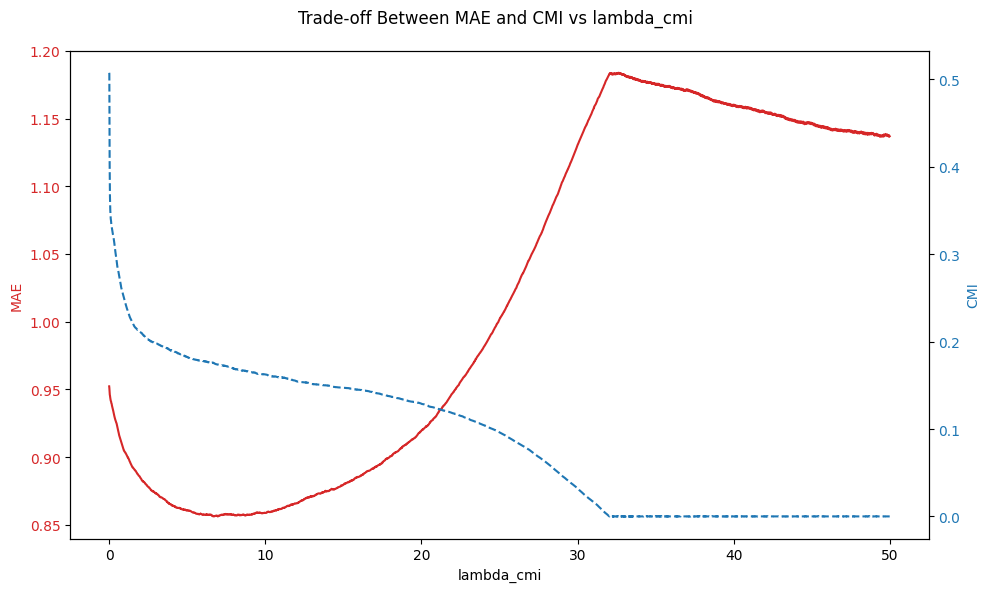

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mnar25 # list of length 2000 from your model
mae_history = sk_maes25mnar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mnar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


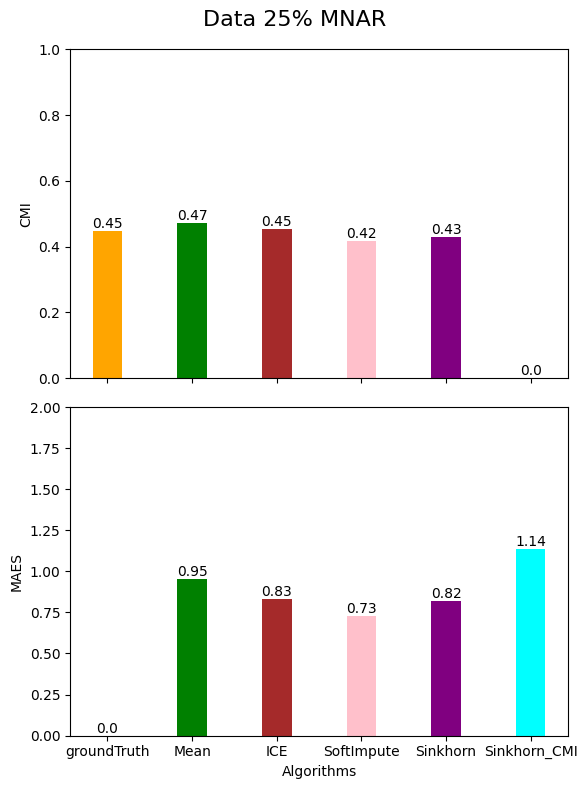

In [62]:

# Define values and categories
values_cmi_mnar25 = [cmi_groundTruth.detach(),cmi_mean_mnar25.detach(),cmi_ice_mnar25.detach(),cmi_soft_mnar25.detach(),on_cmi_missmnar25.detach(),cmi_mnar25.detach()]
values_maes_mnar25 = [0.0,mean_mae_mnar25.detach(),ice_mae_mnar25.detach(), soft_mae_mnar25.detach(),on_sk_mae_mnar25.detach(),sk_mae_mnar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MNAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mnar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAES bars and add values on top
bars2 = ax2.bar(index, values_maes_mnar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


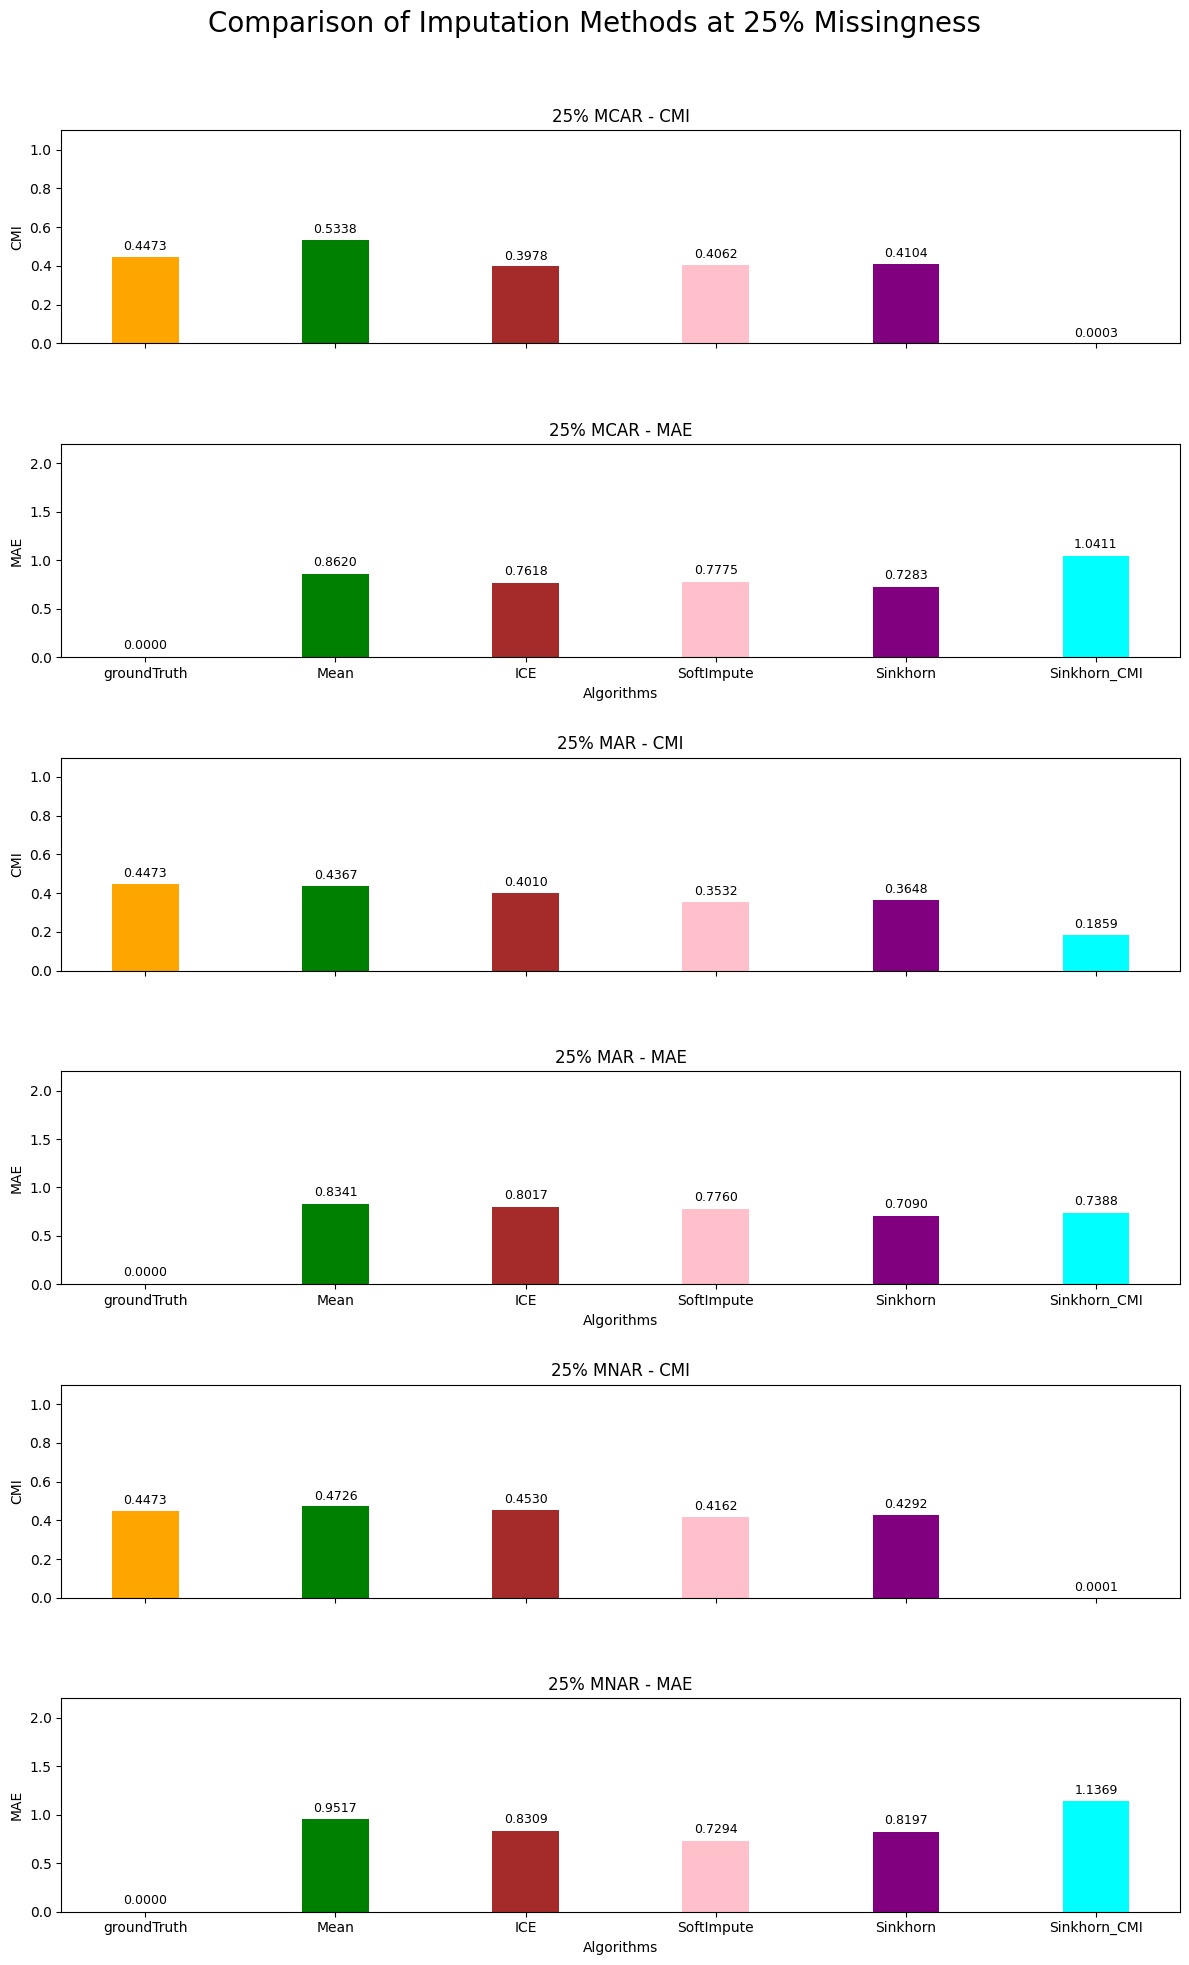

In [63]:
fig, axes = plt.subplots(6, 1, figsize=(12, 20), sharex=False)
fig.suptitle('Comparison of Imputation Methods at 25% Missingness', fontsize=20)

# MCAR, MAR, MNAR order
plot_data = [
    ("25% MCAR", values_cmi_mcar25, values_maes_mcar25),
    ("25% MAR", values_cmi_mar25, values_maes_mar25),
    ("25% MNAR", values_cmi_mnar25, values_maes_mnar25),
]

for i, (title, cmi_vals, mae_vals) in enumerate(plot_data):
    ax_cmi = axes[i * 2]
    ax_mae = axes[i * 2 + 1]

    # ----------------- CMI Plot -----------------
    bars1 = ax_cmi.bar(index, cmi_vals, color=colors, width=bar_width)
    ax_cmi.set_ylabel("CMI")
    ax_cmi.set_ylim(0, 1.1)
    ax_cmi.set_title(f"{title} - CMI")
    for bar in bars1:
        yval = bar.get_height()
        ax_cmi.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.4f}", ha='center', va='bottom', fontsize=9)

    # Remove x-axis labels and ticks for CMI
    ax_cmi.set_xticks(index)
    ax_cmi.set_xticklabels([])

    # ----------------- MAE Plot -----------------
    bars2 = ax_mae.bar(index, mae_vals, color=colors, width=bar_width)
    ax_mae.set_ylabel("MAE")
    ax_mae.set_ylim(0, 2.2)
    ax_mae.set_title(f"{title} - MAE")
    for bar in bars2:
        yval = bar.get_height()
        ax_mae.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f"{yval:.4f}", ha='center', va='bottom', fontsize=9)

    ax_mae.set_xticks(index)
    ax_mae.set_xticklabels(categories, fontsize=10, rotation=0)
    ax_mae.set_xlabel("Algorithms")

plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=2.5)
plt.show()


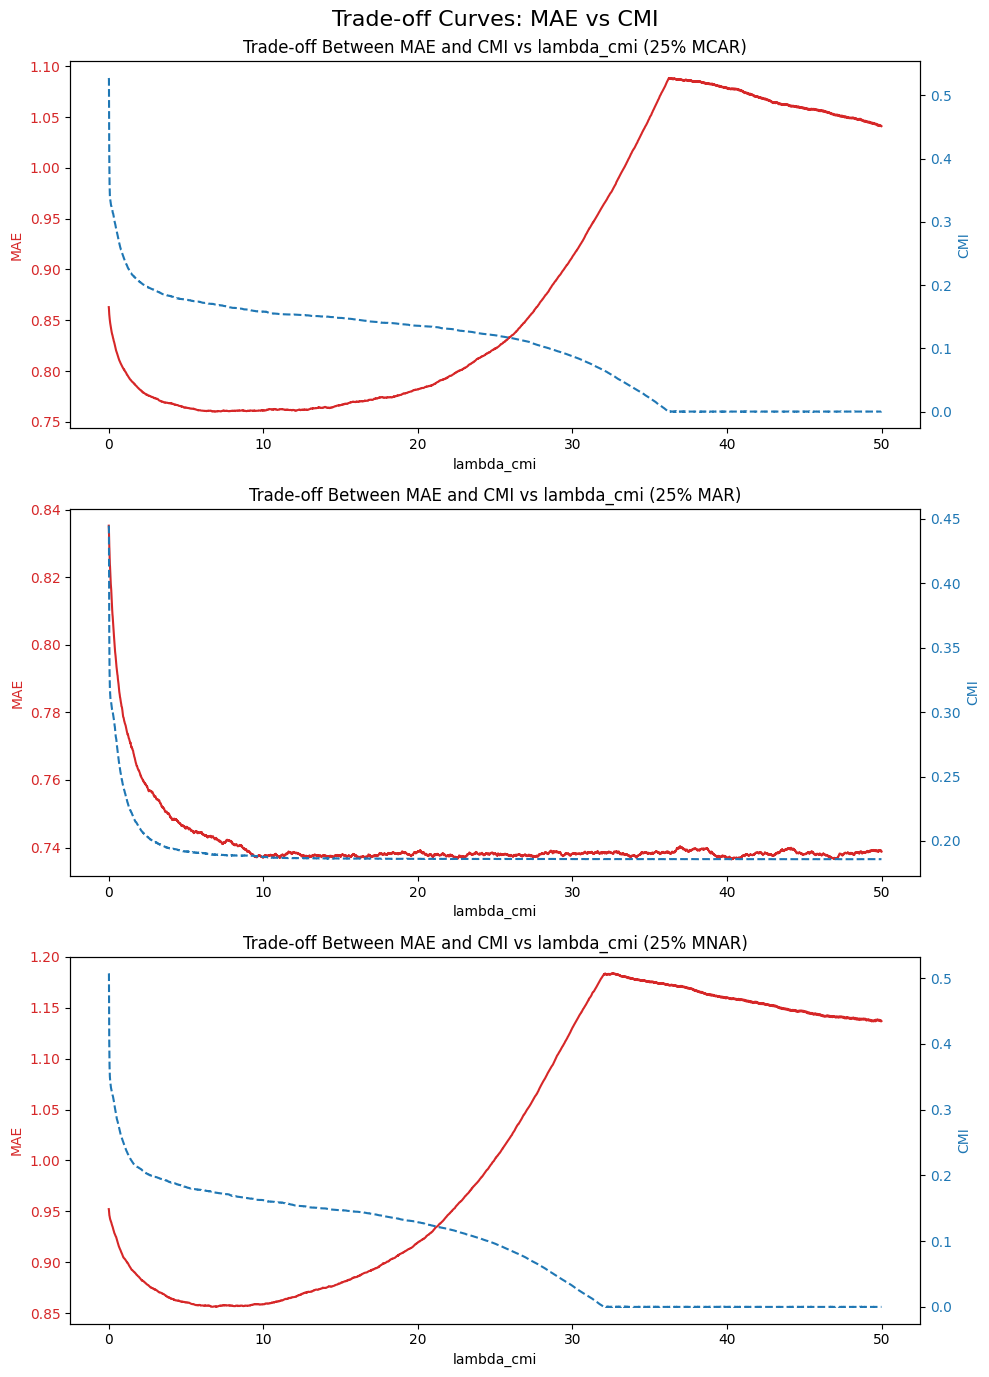

In [64]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

# New order: MCAR, MAR, MNAR
datasets = [
    ("25% MCAR", lamda_cmi_mcar25, sk_maes25mcar, cmi_loss_mcar25),
    ("25% MAR", lamda_cmi_mar25, sk_maes25mar, cmi_loss_mar25),
    ("25% MNAR", lamda_cmi_mnar25, sk_maes25mnar, cmi_loss_mnar25),
]

for i, (title, lambda_vals, mae_vals, cmi_vals) in enumerate(datasets):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # MAE (left y-axis)
    ax1.set_ylabel('MAE', color='tab:red')
    ax1.plot(lambda_vals, mae_vals, color='tab:red', label='MAE')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # CMI (right y-axis)
    ax2.set_ylabel('CMI', color='tab:blue')
    ax2.plot(lambda_vals, cmi_vals, color='tab:blue', linestyle='--', label='CMI')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    ax1.set_title(f'Trade-off Between MAE and CMI vs lambda_cmi ({title})')
    ax1.set_xlabel('lambda_cmi')

plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.suptitle('Trade-off Curves: MAE vs CMI', fontsize=16)
plt.show()


### MCAR

### 5% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mcar_sk_mae5, mcar_sk_cmi5, mcar_skCmi_mae5, mcar_skCmi_cmi5, mcar_mean_mae5, mcar_mean_cmi5, mcar_ice_mae5, mcar_ice_cmi5, mcar_soft_mae5,  mcar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5471
INFO:root:Iteration 0:	 Loss: 2.5363	 Validation MAE: 0.8500	RMSE: 1.0160
INFO:root:Iteration 50:	 Loss: 2.5270	 Validation MAE: 0.7527	RMSE: 0.9762
INFO:root:Iteration 100:	 Loss: 2.5225	 Validation MAE: 0.7199	RMSE: 0.9624
INFO:root:Iteration 150:	 Loss: 2.6113	 Validation MAE: 0.6950	RMSE: 0.9496
INFO:root:Iteration 200:	 Loss: 2.5113	 Validation MAE: 0.6853	RMSE: 0.9488
INFO:root:Iteration 250:	 Loss: 2.6707	 Validation MAE: 0.6739	RMSE: 0.9457
INFO:root:Iteration 300:	 Loss: 2.3179	 Validation MAE: 0.6694	RMSE: 0.9458
INFO:root:Iteration 350:	 Loss: 2.4568	 Validation MAE: 0.6623	RMSE: 0.9459
INFO:root:Iteration 400:	 Loss: 3.1045	 Validation MAE: 0.6543	RMSE: 0.9414
INFO:root:Iteration 450:	 Loss: 2.3202	 Validation MAE: 0.6496	RMSE: 0.9351
INFO:root:Iteration 500:	 Loss: 2.3357	 Validation MAE: 0.6479	RMSE: 0.9359
INFO:root:Iteration 550:	 Loss: 2.5682	 Validation MAE: 0.6459	RMSE: 0.9372
INFO:root:Iteration 600:	 Loss: 2.4206	 Validat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar5 = {
    'Mean': mcar_mean_cmi5,
    'ICE': mcar_ice_cmi5,
    'SoftImpute': mcar_soft_cmi5,
    'Sinkhorn': mcar_sk_cmi5,
    'Sinkhorn_CMI': mcar_skCmi_cmi5
}
mae_data_mcar5 = {
    'Mean': mcar_mean_mae5,
    'ICE': mcar_ice_mae5,
    'SoftImpute': mcar_soft_mae5,
    'Sinkhorn': mcar_sk_mae5,
    'Sinkhorn_CMI': mcar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar5[algo]
    cmi_vals = cmi_data_mcar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### 10% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae10, mcar_sk_cmi10, mcar_skCmi_mae10, mcar_skCmi_cmi10, mcar_mean_mae10, mcar_mean_cmi10, mcar_ice_mae10, mcar_ice_cmi10, mcar_soft_mae10, mcar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5221
INFO:root:Iteration 0:	 Loss: 2.5271	 Validation MAE: 0.8781	RMSE: 1.0560
INFO:root:Iteration 50:	 Loss: 2.2761	 Validation MAE: 0.7727	RMSE: 1.0074
INFO:root:Iteration 100:	 Loss: 2.4283	 Validation MAE: 0.7362	RMSE: 0.9919
INFO:root:Iteration 150:	 Loss: 2.2363	 Validation MAE: 0.7174	RMSE: 0.9874
INFO:root:Iteration 200:	 Loss: 2.5400	 Validation MAE: 0.7016	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 2.4012	 Validation MAE: 0.6914	RMSE: 0.9786
INFO:root:Iteration 300:	 Loss: 2.2598	 Validation MAE: 0.6838	RMSE: 0.9752
INFO:root:Iteration 350:	 Loss: 2.3362	 Validation MAE: 0.6745	RMSE: 0.9715
INFO:root:Iteration 400:	 Loss: 2.1902	 Validation MAE: 0.6716	RMSE: 0.9710
INFO:root:Iteration 450:	 Loss: 2.2093	 Validation MAE: 0.6664	RMSE: 0.9683
INFO:root:Iteration 500:	 Loss: 2.0970	 Validation MAE: 0.6621	RMSE: 0.9652
INFO:root:Iteration 550:	 Loss: 2.2531	 Validation MAE: 0.6634	RMSE: 0.9681
INFO:root:Iteration 600:	 Loss: 2.1888	 Validat

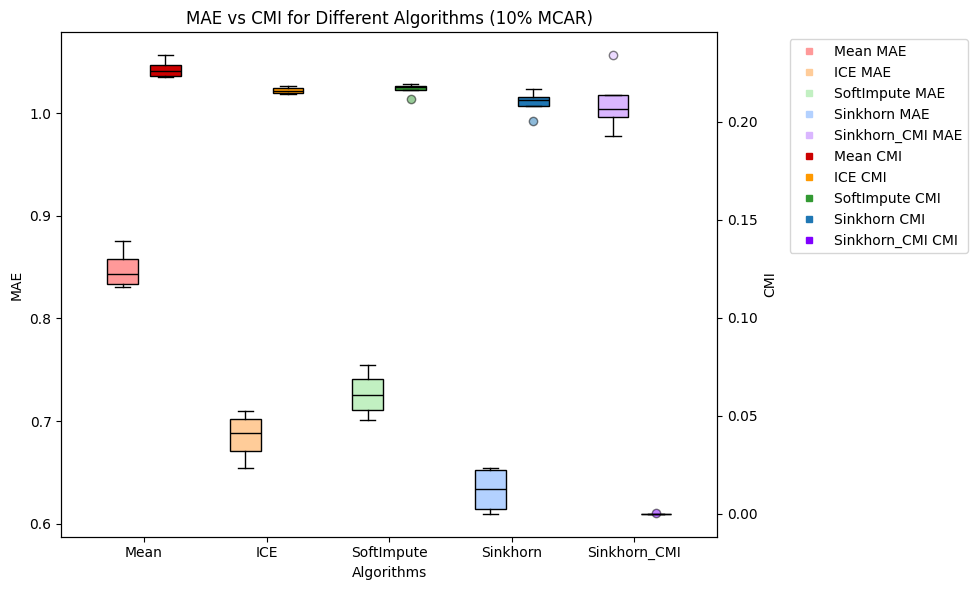

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar10 = {
    'Mean': mcar_mean_cmi10,
    'ICE': mcar_ice_cmi10,
    'SoftImpute': mcar_soft_cmi10,
    'Sinkhorn': mcar_sk_cmi10,
    'Sinkhorn_CMI': mcar_skCmi_cmi10
}
mae_data_mcar10 = {
    'Mean': mcar_mean_mae10,
    'ICE': mcar_ice_mae10,
    'SoftImpute': mcar_soft_mae10,
    'Sinkhorn': mcar_sk_mae10,
    'Sinkhorn_CMI': mcar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar10[algo]
    cmi_vals = cmi_data_mcar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae15, mcar_sk_cmi15, mcar_skCmi_mae15, mcar_skCmi_cmi15, mcar_mean_mae15, mcar_mean_cmi15, mcar_ice_mae15, mcar_ice_cmi15, mcar_soft_mae15, mcar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4912
INFO:root:Iteration 0:	 Loss: 2.3263	 Validation MAE: 0.8430	RMSE: 1.0001
INFO:root:Iteration 50:	 Loss: 2.2554	 Validation MAE: 0.7537	RMSE: 0.9683
INFO:root:Iteration 100:	 Loss: 2.1644	 Validation MAE: 0.7223	RMSE: 0.9587
INFO:root:Iteration 150:	 Loss: 2.1129	 Validation MAE: 0.7047	RMSE: 0.9549
INFO:root:Iteration 200:	 Loss: 2.2498	 Validation MAE: 0.6947	RMSE: 0.9549
INFO:root:Iteration 250:	 Loss: 2.3506	 Validation MAE: 0.6846	RMSE: 0.9502
INFO:root:Iteration 300:	 Loss: 2.3762	 Validation MAE: 0.6805	RMSE: 0.9491
INFO:root:Iteration 350:	 Loss: 2.2683	 Validation MAE: 0.6780	RMSE: 0.9505
INFO:root:Iteration 400:	 Loss: 2.1121	 Validation MAE: 0.6742	RMSE: 0.9512
INFO:root:Iteration 450:	 Loss: 2.0293	 Validation MAE: 0.6711	RMSE: 0.9531
INFO:root:Iteration 500:	 Loss: 1.9154	 Validation MAE: 0.6678	RMSE: 0.9527
INFO:root:Iteration 550:	 Loss: 2.2961	 Validation MAE: 0.6696	RMSE: 0.9558
INFO:root:Iteration 600:	 Loss: 2.2112	 Validat

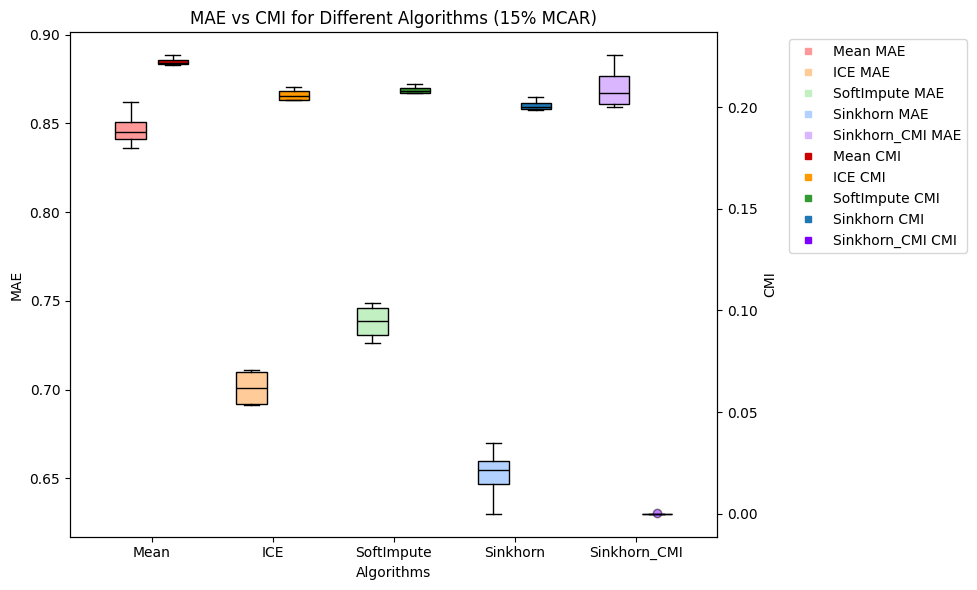

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar15 = {
    'Mean': mcar_mean_cmi15,
    'ICE': mcar_ice_cmi15,
    'SoftImpute': mcar_soft_cmi15,
    'Sinkhorn': mcar_sk_cmi15,
    'Sinkhorn_CMI': mcar_skCmi_cmi15
}
mae_data_mcar15 = {
    'Mean': mcar_mean_mae15,
    'ICE': mcar_ice_mae15,
    'SoftImpute': mcar_soft_mae15,
    'Sinkhorn': mcar_sk_mae15,
    'Sinkhorn_CMI': mcar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar15[algo]
    cmi_vals = cmi_data_mcar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae20, mcar_sk_cmi20, mcar_skCmi_mae20, mcar_skCmi_cmi20, mcar_mean_mae20, mcar_mean_cmi20, mcar_ice_mae20, mcar_ice_cmi20, mcar_soft_mae20, mcar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4633
INFO:root:Iteration 0:	 Loss: 2.6567	 Validation MAE: 0.8531	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 2.0398	 Validation MAE: 0.7599	RMSE: 0.9735
INFO:root:Iteration 100:	 Loss: 2.0552	 Validation MAE: 0.7289	RMSE: 0.9665
INFO:root:Iteration 150:	 Loss: 1.9240	 Validation MAE: 0.7126	RMSE: 0.9637
INFO:root:Iteration 200:	 Loss: 2.1285	 Validation MAE: 0.6986	RMSE: 0.9621
INFO:root:Iteration 250:	 Loss: 2.0264	 Validation MAE: 0.6875	RMSE: 0.9557
INFO:root:Iteration 300:	 Loss: 1.9867	 Validation MAE: 0.6799	RMSE: 0.9551
INFO:root:Iteration 350:	 Loss: 2.2002	 Validation MAE: 0.6740	RMSE: 0.9539
INFO:root:Iteration 400:	 Loss: 1.9239	 Validation MAE: 0.6739	RMSE: 0.9562
INFO:root:Iteration 450:	 Loss: 1.9685	 Validation MAE: 0.6706	RMSE: 0.9567
INFO:root:Iteration 500:	 Loss: 2.0511	 Validation MAE: 0.6688	RMSE: 0.9559
INFO:root:Iteration 550:	 Loss: 2.2345	 Validation MAE: 0.6661	RMSE: 0.9552
INFO:root:Iteration 600:	 Loss: 2.0395	 Validat

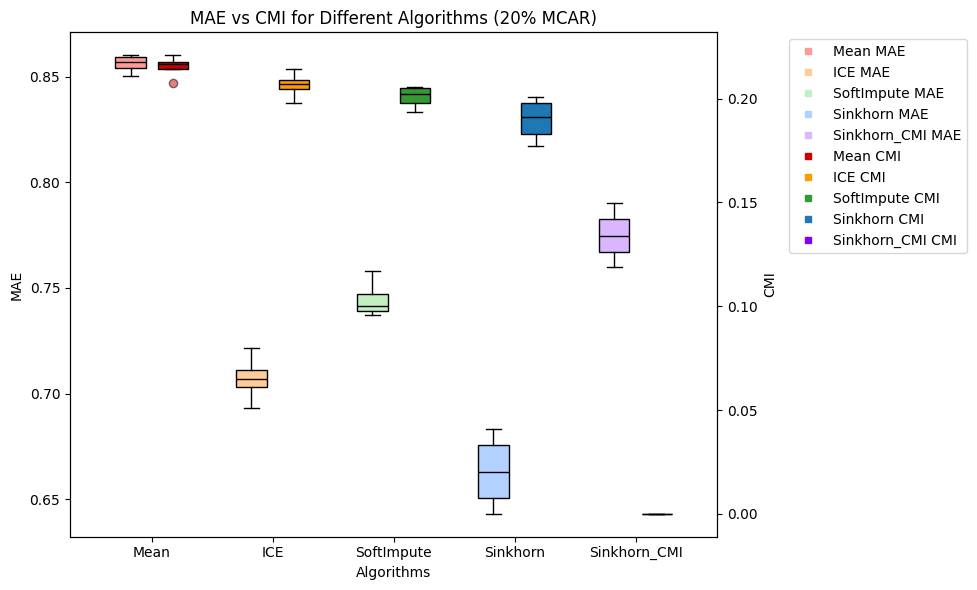

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar20 = {
    'Mean': mcar_mean_cmi20,
    'ICE': mcar_ice_cmi20,
    'SoftImpute': mcar_soft_cmi20,
    'Sinkhorn': mcar_sk_cmi20,
    'Sinkhorn_CMI': mcar_skCmi_cmi20
}
mae_data_mcar20 = {
    'Mean': mcar_mean_mae20,
    'ICE': mcar_ice_mae20,
    'SoftImpute': mcar_soft_mae20,
    'Sinkhorn': mcar_sk_mae20,
    'Sinkhorn_CMI': mcar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar20[algo]
    cmi_vals = cmi_data_mcar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae25, mcar_sk_cmi25, mcar_skCmi_mae25, mcar_skCmi_cmi25, mcar_mean_mae25, mcar_mean_cmi25, mcar_ice_mae25, mcar_ice_cmi25, mcar_soft_mae25, mcar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

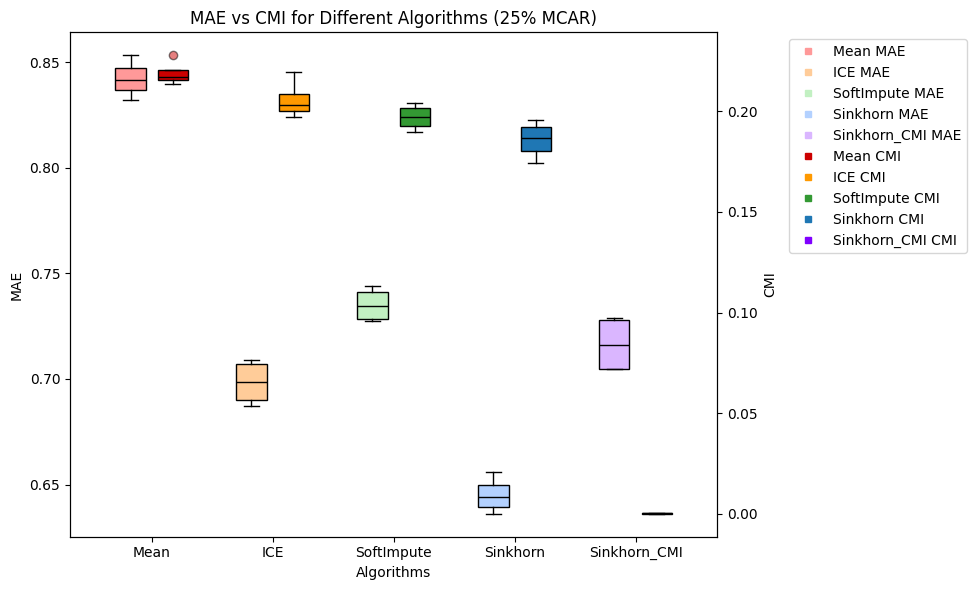

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar25 = {
    'Mean': mcar_mean_cmi25,
    'ICE': mcar_ice_cmi25,
    'SoftImpute': mcar_soft_cmi25,
    'Sinkhorn': mcar_sk_cmi25,
    'Sinkhorn_CMI': mcar_skCmi_cmi25
}
mae_data_mcar25 = {
    'Mean': mcar_mean_mae25,
    'ICE': mcar_ice_mae25,
    'SoftImpute': mcar_soft_mae25,
    'Sinkhorn': mcar_sk_mae25,
    'Sinkhorn_CMI': mcar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar25[algo]
    cmi_vals = cmi_data_mcar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae30, mcar_sk_cmi30, mcar_skCmi_mae30, mcar_skCmi_cmi30, mcar_mean_mae30, mcar_mean_cmi30, mcar_ice_mae30, mcar_ice_cmi30, mcar_soft_mae30, mcar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

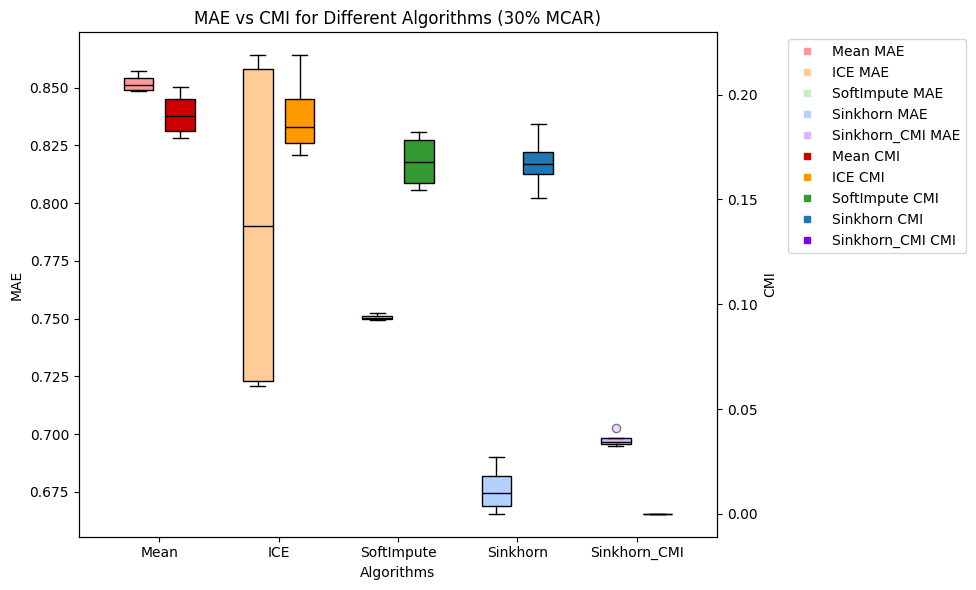

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar30 = {
    'Mean': mcar_mean_cmi30,
    'ICE': mcar_ice_cmi30,
    'SoftImpute': mcar_soft_cmi30,
    'Sinkhorn': mcar_sk_cmi30,
    'Sinkhorn_CMI': mcar_skCmi_cmi30
}
mae_data_mcar30 = {
    'Mean': mcar_mean_mae30,
    'ICE': mcar_ice_mae30,
    'SoftImpute': mcar_soft_mae30,
    'Sinkhorn': mcar_sk_mae30,
    'Sinkhorn_CMI': mcar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar30[algo]
    cmi_vals = cmi_data_mcar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


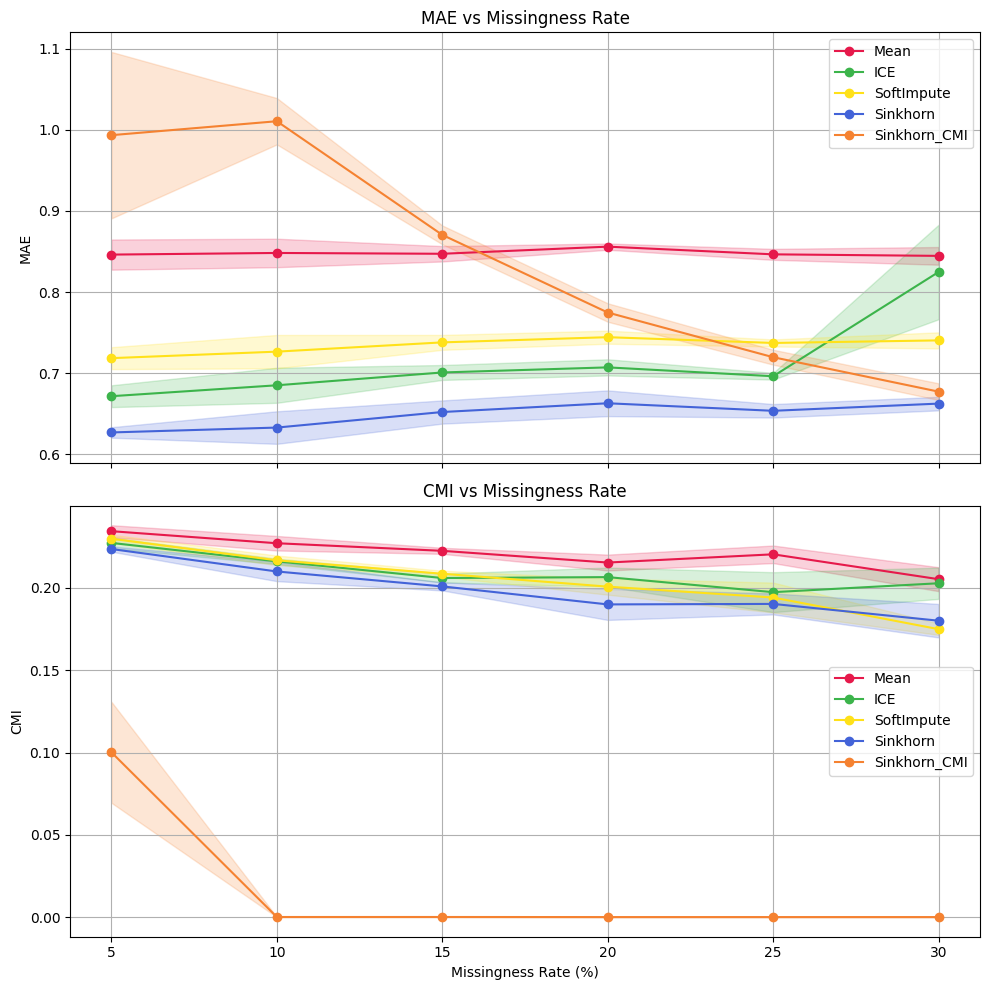

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mcar_mean_mae5, mcar_mean_mae10, mcar_mean_mae15, mcar_mean_mae20, mcar_mean_mae25, mcar_mean_mae30],
    'ICE': [mcar_ice_mae5, mcar_ice_mae10, mcar_ice_mae15, mcar_ice_mae20, mcar_ice_mae25, mcar_ice_mae30],
    'SoftImpute': [mcar_soft_mae5, mcar_soft_mae10, mcar_soft_mae15, mcar_soft_mae20, mcar_soft_mae25, mcar_soft_mae30],
    'Sinkhorn': [mcar_sk_mae5, mcar_sk_mae10, mcar_sk_mae15, mcar_sk_mae20, mcar_sk_mae25, mcar_sk_mae30],
    'Sinkhorn_CMI': [mcar_skCmi_mae5, mcar_skCmi_mae10, mcar_skCmi_mae15, mcar_skCmi_mae20, mcar_skCmi_mae25, mcar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mcar_mean_cmi5, mcar_mean_cmi10, mcar_mean_cmi15, mcar_mean_cmi20, mcar_mean_cmi25, mcar_mean_cmi30],
    'ICE': [mcar_ice_cmi5, mcar_ice_cmi10, mcar_ice_cmi15, mcar_ice_cmi20, mcar_ice_cmi25, mcar_ice_cmi30],
    'SoftImpute': [mcar_soft_cmi5, mcar_soft_cmi10, mcar_soft_cmi15, mcar_soft_cmi20, mcar_soft_cmi25, mcar_soft_cmi30],
    'Sinkhorn': [mcar_sk_cmi5, mcar_sk_cmi10, mcar_sk_cmi15, mcar_sk_cmi20, mcar_sk_cmi25, mcar_sk_cmi30],
    'Sinkhorn_CMI': [mcar_skCmi_cmi5, mcar_skCmi_cmi10, mcar_skCmi_cmi15, mcar_skCmi_cmi20, mcar_skCmi_cmi25, mcar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


### MAR

### 5% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mar_sk_mae5, mar_sk_cmi5, mar_skCmi_mae5, mar_skCmi_cmi5, mar_mean_mae5, mar_mean_cmi5, mar_ice_mae5, mar_ice_cmi5, mar_soft_mae5, mar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5471
INFO:root:Iteration 0:	 Loss: 2.5363	 Validation MAE: 0.8500	RMSE: 1.0160
INFO:root:Iteration 50:	 Loss: 2.5270	 Validation MAE: 0.7527	RMSE: 0.9762
INFO:root:Iteration 100:	 Loss: 2.5225	 Validation MAE: 0.7199	RMSE: 0.9624
INFO:root:Iteration 150:	 Loss: 2.6113	 Validation MAE: 0.6950	RMSE: 0.9496
INFO:root:Iteration 200:	 Loss: 2.5113	 Validation MAE: 0.6853	RMSE: 0.9488
INFO:root:Iteration 250:	 Loss: 2.6707	 Validation MAE: 0.6739	RMSE: 0.9457
INFO:root:Iteration 300:	 Loss: 2.3179	 Validation MAE: 0.6694	RMSE: 0.9458
INFO:root:Iteration 350:	 Loss: 2.4568	 Validation MAE: 0.6623	RMSE: 0.9459
INFO:root:Iteration 400:	 Loss: 3.1045	 Validation MAE: 0.6543	RMSE: 0.9414
INFO:root:Iteration 450:	 Loss: 2.3202	 Validation MAE: 0.6496	RMSE: 0.9351
INFO:root:Iteration 500:	 Loss: 2.3357	 Validation MAE: 0.6479	RMSE: 0.9359
INFO:root:Iteration 550:	 Loss: 2.5682	 Validation MAE: 0.6459	RMSE: 0.9372
INFO:root:Iteration 600:	 Loss: 2.4206	 Validat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar5 = {
    'Mean': mar_mean_cmi5,
    'ICE': mar_ice_cmi5,
    'SoftImpute': mar_soft_cmi5,
    'Sinkhorn': mar_sk_cmi5,
    'Sinkhorn_CMI': mar_skCmi_cmi5
}
mae_data_mar5 = {
    'Mean': mar_mean_mae5,
    'ICE': mar_ice_mae5,
    'SoftImpute': mar_soft_mae5,
    'Sinkhorn': mar_sk_mae5,
    'Sinkhorn_CMI': mar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar5[algo]
    cmi_vals = cmi_data_mar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### 10% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae10, mar_sk_cmi10, mar_skCmi_mae10, mar_skCmi_cmi10, mar_mean_mae10, mar_mean_cmi10, mar_ice_mae10, mar_ice_cmi10, mar_soft_mae10, mar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5221
INFO:root:Iteration 0:	 Loss: 2.5271	 Validation MAE: 0.8781	RMSE: 1.0560
INFO:root:Iteration 50:	 Loss: 2.2761	 Validation MAE: 0.7727	RMSE: 1.0074
INFO:root:Iteration 100:	 Loss: 2.4283	 Validation MAE: 0.7362	RMSE: 0.9919
INFO:root:Iteration 150:	 Loss: 2.2363	 Validation MAE: 0.7174	RMSE: 0.9874
INFO:root:Iteration 200:	 Loss: 2.5400	 Validation MAE: 0.7016	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 2.4012	 Validation MAE: 0.6914	RMSE: 0.9786
INFO:root:Iteration 300:	 Loss: 2.2598	 Validation MAE: 0.6838	RMSE: 0.9752
INFO:root:Iteration 350:	 Loss: 2.3362	 Validation MAE: 0.6745	RMSE: 0.9715
INFO:root:Iteration 400:	 Loss: 2.1902	 Validation MAE: 0.6716	RMSE: 0.9710
INFO:root:Iteration 450:	 Loss: 2.2093	 Validation MAE: 0.6664	RMSE: 0.9683
INFO:root:Iteration 500:	 Loss: 2.0970	 Validation MAE: 0.6621	RMSE: 0.9652
INFO:root:Iteration 550:	 Loss: 2.2531	 Validation MAE: 0.6634	RMSE: 0.9681
INFO:root:Iteration 600:	 Loss: 2.1888	 Validat

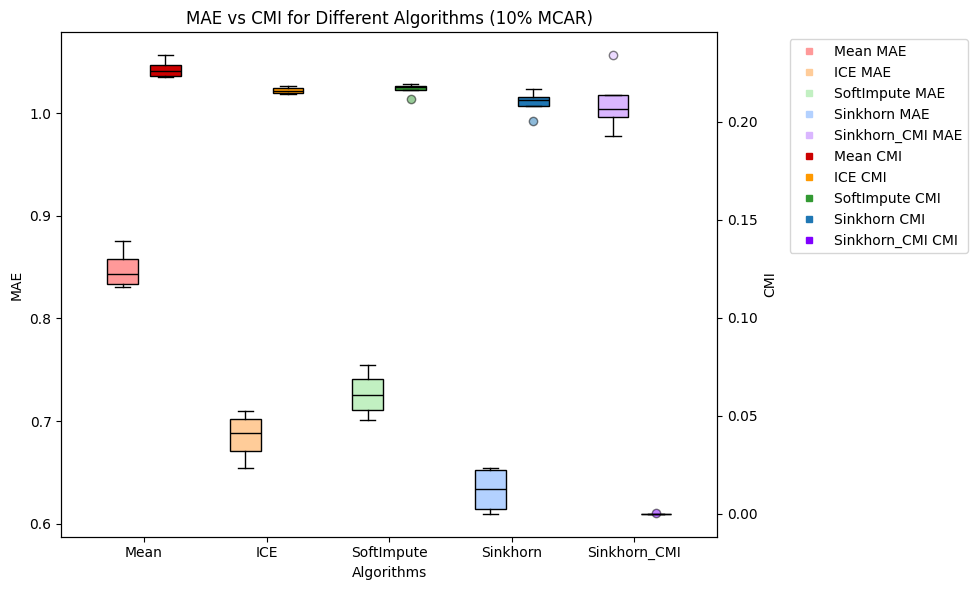

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar10 = {
    'Mean': mar_mean_cmi10,
    'ICE': mar_ice_cmi10,
    'SoftImpute': mar_soft_cmi10,
    'Sinkhorn': mar_sk_cmi10,
    'Sinkhorn_CMI': mar_skCmi_cmi10
}
mae_data_mar10 = {
    'Mean': mar_mean_mae10,
    'ICE': mar_ice_mae10,
    'SoftImpute': mar_soft_mae10,
    'Sinkhorn': mar_sk_mae10,
    'Sinkhorn_CMI': mar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar10[algo]
    cmi_vals = cmi_data_mar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae15, mar_sk_cmi15, mar_skCmi_mae15, mar_skCmi_cmi15, mar_mean_mae15, mar_mean_cmi15, mar_ice_mae15, mar_ice_cmi15, mar_soft_mae15, mar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4912
INFO:root:Iteration 0:	 Loss: 2.3263	 Validation MAE: 0.8430	RMSE: 1.0001
INFO:root:Iteration 50:	 Loss: 2.2554	 Validation MAE: 0.7537	RMSE: 0.9683
INFO:root:Iteration 100:	 Loss: 2.1644	 Validation MAE: 0.7223	RMSE: 0.9587
INFO:root:Iteration 150:	 Loss: 2.1129	 Validation MAE: 0.7047	RMSE: 0.9549
INFO:root:Iteration 200:	 Loss: 2.2498	 Validation MAE: 0.6947	RMSE: 0.9549
INFO:root:Iteration 250:	 Loss: 2.3506	 Validation MAE: 0.6846	RMSE: 0.9502
INFO:root:Iteration 300:	 Loss: 2.3762	 Validation MAE: 0.6805	RMSE: 0.9491
INFO:root:Iteration 350:	 Loss: 2.2683	 Validation MAE: 0.6780	RMSE: 0.9505
INFO:root:Iteration 400:	 Loss: 2.1121	 Validation MAE: 0.6742	RMSE: 0.9512
INFO:root:Iteration 450:	 Loss: 2.0293	 Validation MAE: 0.6711	RMSE: 0.9531
INFO:root:Iteration 500:	 Loss: 1.9154	 Validation MAE: 0.6678	RMSE: 0.9527
INFO:root:Iteration 550:	 Loss: 2.2961	 Validation MAE: 0.6696	RMSE: 0.9558
INFO:root:Iteration 600:	 Loss: 2.2112	 Validat

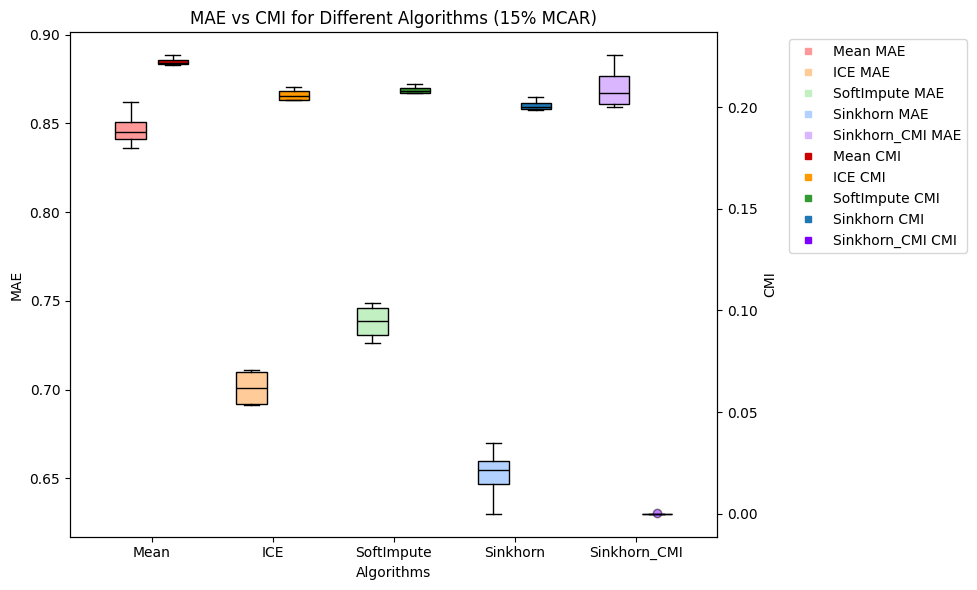

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar15 = {
    'Mean': mar_mean_cmi15,
    'ICE': mar_ice_cmi15,
    'SoftImpute': mar_soft_cmi15,
    'Sinkhorn': mar_sk_cmi15,
    'Sinkhorn_CMI': mar_skCmi_cmi15
}
mae_data_mar15 = {
    'Mean': mar_mean_mae15,
    'ICE': mar_ice_mae15,
    'SoftImpute': mar_soft_mae15,
    'Sinkhorn': mar_sk_mae15,
    'Sinkhorn_CMI': mar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar15[algo]
    cmi_vals = cmi_data_mar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae20, mar_sk_cmi20, mar_skCmi_mae20, mar_skCmi_cmi20, mar_mean_mae20, mar_mean_cmi20, mar_ice_mae20, mar_ice_cmi20, mar_soft_mae20, mar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4633
INFO:root:Iteration 0:	 Loss: 2.6567	 Validation MAE: 0.8531	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 2.0398	 Validation MAE: 0.7599	RMSE: 0.9735
INFO:root:Iteration 100:	 Loss: 2.0552	 Validation MAE: 0.7289	RMSE: 0.9665
INFO:root:Iteration 150:	 Loss: 1.9240	 Validation MAE: 0.7126	RMSE: 0.9637
INFO:root:Iteration 200:	 Loss: 2.1285	 Validation MAE: 0.6986	RMSE: 0.9621
INFO:root:Iteration 250:	 Loss: 2.0264	 Validation MAE: 0.6875	RMSE: 0.9557
INFO:root:Iteration 300:	 Loss: 1.9867	 Validation MAE: 0.6799	RMSE: 0.9551
INFO:root:Iteration 350:	 Loss: 2.2002	 Validation MAE: 0.6740	RMSE: 0.9539
INFO:root:Iteration 400:	 Loss: 1.9239	 Validation MAE: 0.6739	RMSE: 0.9562
INFO:root:Iteration 450:	 Loss: 1.9685	 Validation MAE: 0.6706	RMSE: 0.9567
INFO:root:Iteration 500:	 Loss: 2.0511	 Validation MAE: 0.6688	RMSE: 0.9559
INFO:root:Iteration 550:	 Loss: 2.2345	 Validation MAE: 0.6661	RMSE: 0.9552
INFO:root:Iteration 600:	 Loss: 2.0395	 Validat

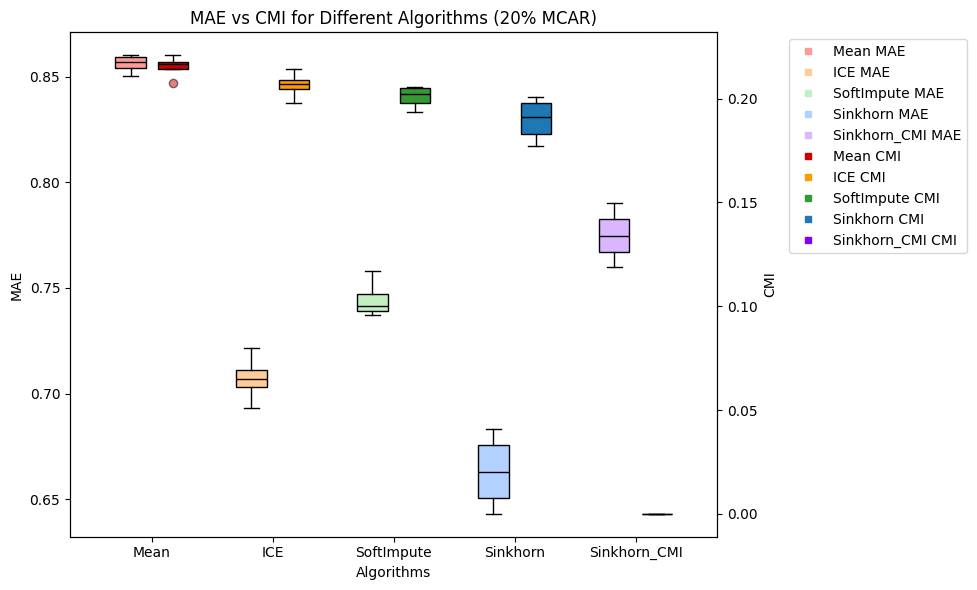

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar20 = {
    'Mean': mar_mean_cmi20,
    'ICE': mar_ice_cmi20,
    'SoftImpute': mar_soft_cmi20,
    'Sinkhorn': mar_sk_cmi20,
    'Sinkhorn_CMI': mar_skCmi_cmi20
}
mae_data_mar20 = {
    'Mean': mar_mean_mae20,
    'ICE': mar_ice_mae20,
    'SoftImpute': mar_soft_mae20,
    'Sinkhorn': mar_sk_mae20,
    'Sinkhorn_CMI': mar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar20[algo]
    cmi_vals = cmi_data_mar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae25, mar_sk_cmi25, mar_skCmi_mae25, mar_skCmi_cmi25, mar_mean_mae25, mar_mean_cmi25, mar_ice_mae25, mar_ice_cmi25, mar_soft_mae25, mar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

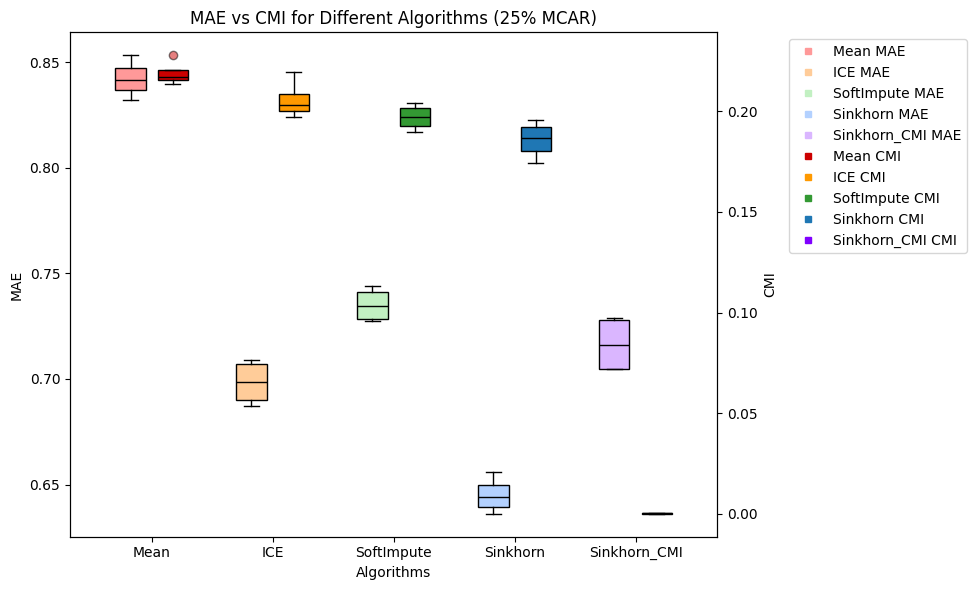

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar25 = {
    'Mean': mar_mean_cmi25,
    'ICE': mar_ice_cmi25,
    'SoftImpute': mar_soft_cmi25,
    'Sinkhorn': mar_sk_cmi25,
    'Sinkhorn_CMI': mar_skCmi_cmi25
}
mae_data_mar25 = {
    'Mean': mar_mean_mae25,
    'ICE': mar_ice_mae25,
    'SoftImpute': mar_soft_mae25,
    'Sinkhorn': mar_sk_mae25,
    'Sinkhorn_CMI': mar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar25[algo]
    cmi_vals = cmi_data_mar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae30, mar_sk_cmi30, mar_skCmi_mae30, mar_skCmi_cmi30, mar_mean_mae30, mar_mean_cmi30, mar_ice_mae30, mar_ice_cmi30, mar_soft_mae30, mar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

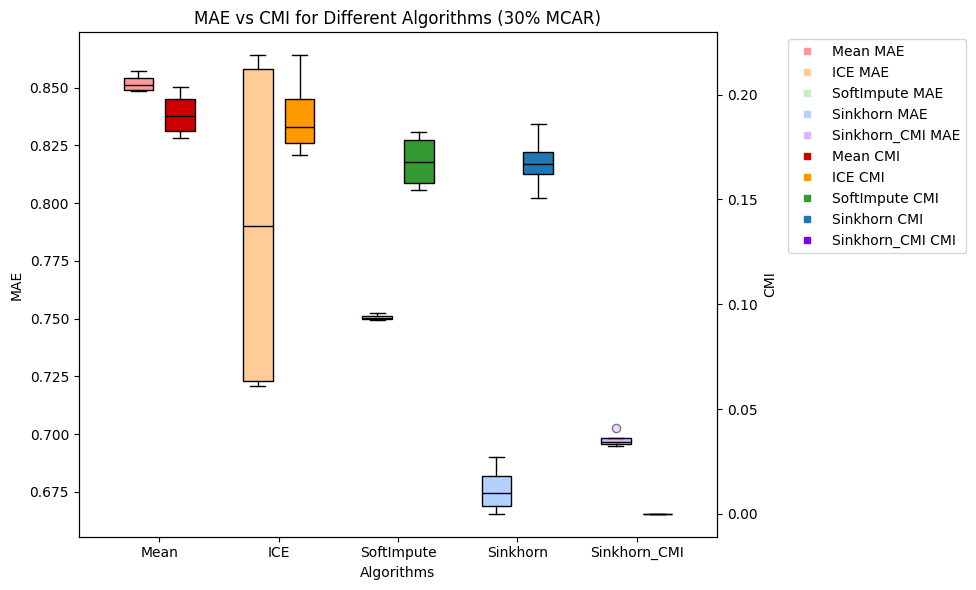

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar30 = {
    'Mean': mar_mean_cmi30,
    'ICE': mar_ice_cmi30,
    'SoftImpute': mar_soft_cmi30,
    'Sinkhorn': mar_sk_cmi30,
    'Sinkhorn_CMI': mar_skCmi_cmi30
}
mae_data_mar30 = {
    'Mean': mar_mean_mae30,
    'ICE': mar_ice_mae30,
    'SoftImpute': mar_soft_mae30,
    'Sinkhorn': mar_sk_mae30,
    'Sinkhorn_CMI': mar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar30[algo]
    cmi_vals = cmi_data_mar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


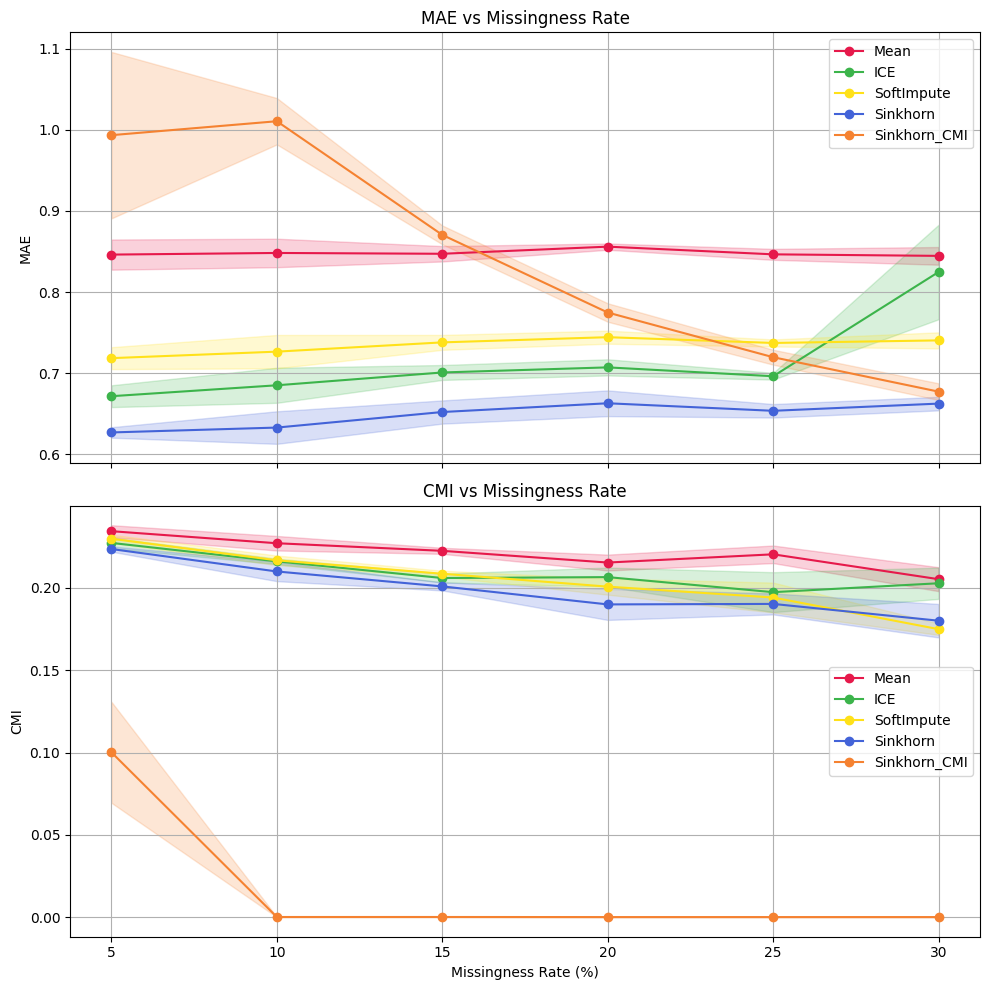

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mar_mean_mae5, mar_mean_mae10, mar_mean_mae15, mar_mean_mae20, mar_mean_mae25, mar_mean_mae30],
    'ICE': [mar_ice_mae5, mar_ice_mae10, mar_ice_mae15, mar_ice_mae20, mar_ice_mae25, mar_ice_mae30],
    'SoftImpute': [mar_soft_mae5, mar_soft_mae10, mar_soft_mae15, mar_soft_mae20, mar_soft_mae25, mar_soft_mae30],
    'Sinkhorn': [mar_sk_mae5, mar_sk_mae10, mar_sk_mae15, mar_sk_mae20, mar_sk_mae25, mar_sk_mae30],
    'Sinkhorn_CMI': [mar_skCmi_mae5, mar_skCmi_mae10, mar_skCmi_mae15, mar_skCmi_mae20, mar_skCmi_mae25, mar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mar_mean_cmi5, mar_mean_cmi10, mar_mean_cmi15, mar_mean_cmi20, mar_mean_cmi25, mar_mean_cmi30],
    'ICE': [mar_ice_cmi5, mar_ice_cmi10, mar_ice_cmi15, mar_ice_cmi20, mar_ice_cmi25, mar_ice_cmi30],
    'SoftImpute': [mar_soft_cmi5, mar_soft_cmi10, mar_soft_cmi15, mar_soft_cmi20, mar_soft_cmi25, mar_soft_cmi30],
    'Sinkhorn': [mar_sk_cmi5, mar_sk_cmi10, mar_sk_cmi15, mar_sk_cmi20, mar_sk_cmi25, mar_sk_cmi30],
    'Sinkhorn_CMI': [mar_skCmi_cmi5, mar_skCmi_cmi10, mar_skCmi_cmi15, mar_skCmi_cmi20, mar_skCmi_cmi25, mar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate MAR (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


### MNAR

### 5% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mnar_sk_mae5, mnar_sk_cmi5, mnar_skCmi_mae5, mnar_skCmi_cmi5, mnar_mean_mae5, mnar_mean_cmi5, mnar_ice_mae5, mnar_ice_cmi5, mnar_soft_mae5,  mnar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5471
INFO:root:Iteration 0:	 Loss: 2.5363	 Validation MAE: 0.8500	RMSE: 1.0160
INFO:root:Iteration 50:	 Loss: 2.5270	 Validation MAE: 0.7527	RMSE: 0.9762
INFO:root:Iteration 100:	 Loss: 2.5225	 Validation MAE: 0.7199	RMSE: 0.9624
INFO:root:Iteration 150:	 Loss: 2.6113	 Validation MAE: 0.6950	RMSE: 0.9496
INFO:root:Iteration 200:	 Loss: 2.5113	 Validation MAE: 0.6853	RMSE: 0.9488
INFO:root:Iteration 250:	 Loss: 2.6707	 Validation MAE: 0.6739	RMSE: 0.9457
INFO:root:Iteration 300:	 Loss: 2.3179	 Validation MAE: 0.6694	RMSE: 0.9458
INFO:root:Iteration 350:	 Loss: 2.4568	 Validation MAE: 0.6623	RMSE: 0.9459
INFO:root:Iteration 400:	 Loss: 3.1045	 Validation MAE: 0.6543	RMSE: 0.9414
INFO:root:Iteration 450:	 Loss: 2.3202	 Validation MAE: 0.6496	RMSE: 0.9351
INFO:root:Iteration 500:	 Loss: 2.3357	 Validation MAE: 0.6479	RMSE: 0.9359
INFO:root:Iteration 550:	 Loss: 2.5682	 Validation MAE: 0.6459	RMSE: 0.9372
INFO:root:Iteration 600:	 Loss: 2.4206	 Validat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar5 = {
    'Mean': mnar_mean_cmi5,
    'ICE': mnar_ice_cmi5,
    'SoftImpute': mnar_soft_cmi5,
    'Sinkhorn': mnar_sk_cmi5,
    'Sinkhorn_CMI': mnar_skCmi_cmi5
}
mae_data_mnar5 = {
    'Mean': mnar_mean_mae5,
    'ICE': mnar_ice_mae5,
    'SoftImpute': mnar_soft_mae5,
    'Sinkhorn': mnar_sk_mae5,
    'Sinkhorn_CMI': mnar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar5[algo]
    cmi_vals = cmi_data_mnar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### 10% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae10, mnar_sk_cmi10, mnar_skCmi_mae10, mnar_skCmi_cmi10, mnar_mean_mae10, mnar_mean_cmi10, mnar_ice_mae10, mnar_ice_cmi10, mnar_soft_mae10, mnar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5221
INFO:root:Iteration 0:	 Loss: 2.5271	 Validation MAE: 0.8781	RMSE: 1.0560
INFO:root:Iteration 50:	 Loss: 2.2761	 Validation MAE: 0.7727	RMSE: 1.0074
INFO:root:Iteration 100:	 Loss: 2.4283	 Validation MAE: 0.7362	RMSE: 0.9919
INFO:root:Iteration 150:	 Loss: 2.2363	 Validation MAE: 0.7174	RMSE: 0.9874
INFO:root:Iteration 200:	 Loss: 2.5400	 Validation MAE: 0.7016	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 2.4012	 Validation MAE: 0.6914	RMSE: 0.9786
INFO:root:Iteration 300:	 Loss: 2.2598	 Validation MAE: 0.6838	RMSE: 0.9752
INFO:root:Iteration 350:	 Loss: 2.3362	 Validation MAE: 0.6745	RMSE: 0.9715
INFO:root:Iteration 400:	 Loss: 2.1902	 Validation MAE: 0.6716	RMSE: 0.9710
INFO:root:Iteration 450:	 Loss: 2.2093	 Validation MAE: 0.6664	RMSE: 0.9683
INFO:root:Iteration 500:	 Loss: 2.0970	 Validation MAE: 0.6621	RMSE: 0.9652
INFO:root:Iteration 550:	 Loss: 2.2531	 Validation MAE: 0.6634	RMSE: 0.9681
INFO:root:Iteration 600:	 Loss: 2.1888	 Validat

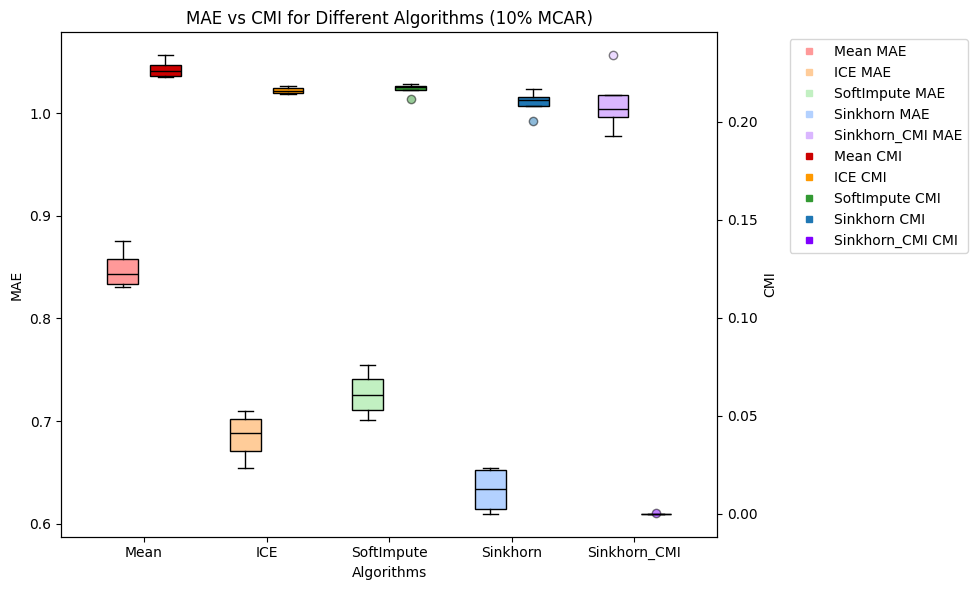

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar10 = {
    'Mean': mnar_mean_cmi10,
    'ICE': mnar_ice_cmi10,
    'SoftImpute': mnar_soft_cmi10,
    'Sinkhorn': mnar_sk_cmi10,
    'Sinkhorn_CMI': mnar_skCmi_cmi10
}
mae_data_mnar10 = {
    'Mean': mnar_mean_mae10,
    'ICE': mnar_ice_mae10,
    'SoftImpute': mnar_soft_mae10,
    'Sinkhorn': mnar_sk_mae10,
    'Sinkhorn_CMI': mnar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar10[algo]
    cmi_vals = cmi_data_mnar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae15, mnar_sk_cmi15, mnar_skCmi_mae15, mnar_skCmi_cmi15, mnar_mean_mae15, mnar_mean_cmi15, mnar_ice_mae15, mnar_ice_cmi15, mnar_soft_mae15, mnar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4912
INFO:root:Iteration 0:	 Loss: 2.3263	 Validation MAE: 0.8430	RMSE: 1.0001
INFO:root:Iteration 50:	 Loss: 2.2554	 Validation MAE: 0.7537	RMSE: 0.9683
INFO:root:Iteration 100:	 Loss: 2.1644	 Validation MAE: 0.7223	RMSE: 0.9587
INFO:root:Iteration 150:	 Loss: 2.1129	 Validation MAE: 0.7047	RMSE: 0.9549
INFO:root:Iteration 200:	 Loss: 2.2498	 Validation MAE: 0.6947	RMSE: 0.9549
INFO:root:Iteration 250:	 Loss: 2.3506	 Validation MAE: 0.6846	RMSE: 0.9502
INFO:root:Iteration 300:	 Loss: 2.3762	 Validation MAE: 0.6805	RMSE: 0.9491
INFO:root:Iteration 350:	 Loss: 2.2683	 Validation MAE: 0.6780	RMSE: 0.9505
INFO:root:Iteration 400:	 Loss: 2.1121	 Validation MAE: 0.6742	RMSE: 0.9512
INFO:root:Iteration 450:	 Loss: 2.0293	 Validation MAE: 0.6711	RMSE: 0.9531
INFO:root:Iteration 500:	 Loss: 1.9154	 Validation MAE: 0.6678	RMSE: 0.9527
INFO:root:Iteration 550:	 Loss: 2.2961	 Validation MAE: 0.6696	RMSE: 0.9558
INFO:root:Iteration 600:	 Loss: 2.2112	 Validat

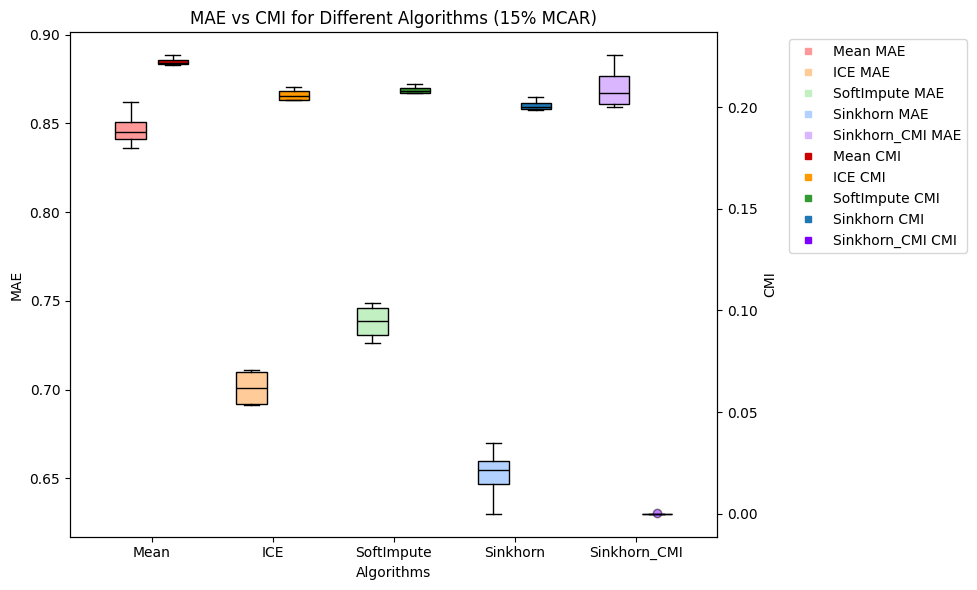

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar15 = {
    'Mean': mnar_mean_cmi15,
    'ICE': mnar_ice_cmi15,
    'SoftImpute': mnar_soft_cmi15,
    'Sinkhorn': mnar_sk_cmi15,
    'Sinkhorn_CMI': mnar_skCmi_cmi15
}
mae_data_mnar15 = {
    'Mean': mnar_mean_mae15,
    'ICE': mnar_ice_mae15,
    'SoftImpute': mnar_soft_mae15,
    'Sinkhorn': mnar_sk_mae15,
    'Sinkhorn_CMI': mnar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar15[algo]
    cmi_vals = cmi_data_mnar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae20, mnar_sk_cmi20, mnar_skCmi_mae20, mnar_skCmi_cmi20, mnar_mean_mae20, mnar_mean_cmi20, mnar_ice_mae20, mnar_ice_cmi20, mnar_soft_mae20, mnar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4633
INFO:root:Iteration 0:	 Loss: 2.6567	 Validation MAE: 0.8531	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 2.0398	 Validation MAE: 0.7599	RMSE: 0.9735
INFO:root:Iteration 100:	 Loss: 2.0552	 Validation MAE: 0.7289	RMSE: 0.9665
INFO:root:Iteration 150:	 Loss: 1.9240	 Validation MAE: 0.7126	RMSE: 0.9637
INFO:root:Iteration 200:	 Loss: 2.1285	 Validation MAE: 0.6986	RMSE: 0.9621
INFO:root:Iteration 250:	 Loss: 2.0264	 Validation MAE: 0.6875	RMSE: 0.9557
INFO:root:Iteration 300:	 Loss: 1.9867	 Validation MAE: 0.6799	RMSE: 0.9551
INFO:root:Iteration 350:	 Loss: 2.2002	 Validation MAE: 0.6740	RMSE: 0.9539
INFO:root:Iteration 400:	 Loss: 1.9239	 Validation MAE: 0.6739	RMSE: 0.9562
INFO:root:Iteration 450:	 Loss: 1.9685	 Validation MAE: 0.6706	RMSE: 0.9567
INFO:root:Iteration 500:	 Loss: 2.0511	 Validation MAE: 0.6688	RMSE: 0.9559
INFO:root:Iteration 550:	 Loss: 2.2345	 Validation MAE: 0.6661	RMSE: 0.9552
INFO:root:Iteration 600:	 Loss: 2.0395	 Validat

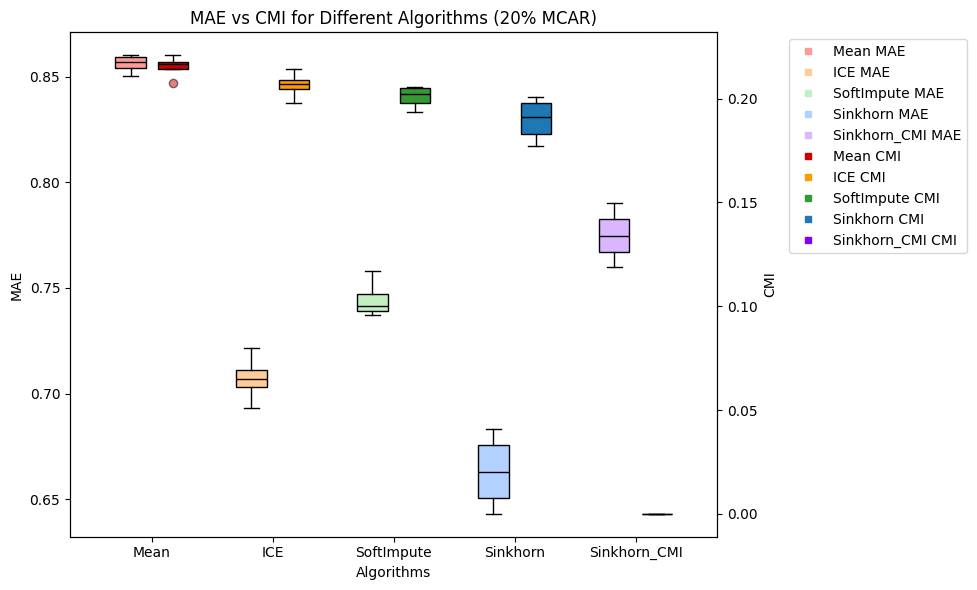

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar20 = {
    'Mean': mnar_mean_cmi20,
    'ICE': mnar_ice_cmi20,
    'SoftImpute': mnar_soft_cmi20,
    'Sinkhorn': mnar_sk_cmi20,
    'Sinkhorn_CMI': mnar_skCmi_cmi20
}
mae_data_mnar20 = {
    'Mean': mnar_mean_mae20,
    'ICE': mnar_ice_mae20,
    'SoftImpute': mnar_soft_mae20,
    'Sinkhorn': mnar_sk_mae20,
    'Sinkhorn_CMI': mnar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar20[algo]
    cmi_vals = cmi_data_mnar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae25, mnar_sk_cmi25, mnar_skCmi_mae25, mnar_skCmi_cmi25, mnar_mean_mae25, mnar_mean_cmi25, mnar_ice_mae25, mnar_ice_cmi25, mnar_soft_mae25, mnar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

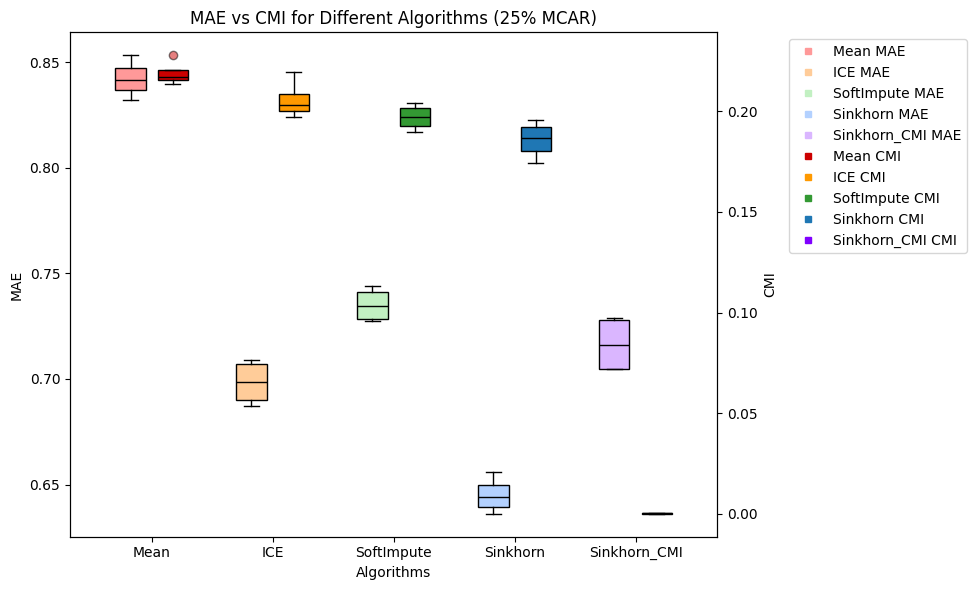

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar25 = {
    'Mean': mnar_mean_cmi25,
    'ICE': mnar_ice_cmi25,
    'SoftImpute': mnar_soft_cmi25,
    'Sinkhorn': mnar_sk_cmi25,
    'Sinkhorn_CMI': mnar_skCmi_cmi25
}
mae_data_mnar25 = {
    'Mean': mnar_mean_mae25,
    'ICE': mnar_ice_mae25,
    'SoftImpute': mnar_soft_mae25,
    'Sinkhorn': mnar_sk_mae25,
    'Sinkhorn_CMI': mnar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar25[algo]
    cmi_vals = cmi_data_mnar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae30, mnar_sk_cmi30, mnar_skCmi_mae30, mnar_skCmi_cmi30, mnar_mean_mae30, mnar_mean_cmi30, mnar_ice_mae30, mnar_ice_cmi30, mnar_soft_mae30, mnar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

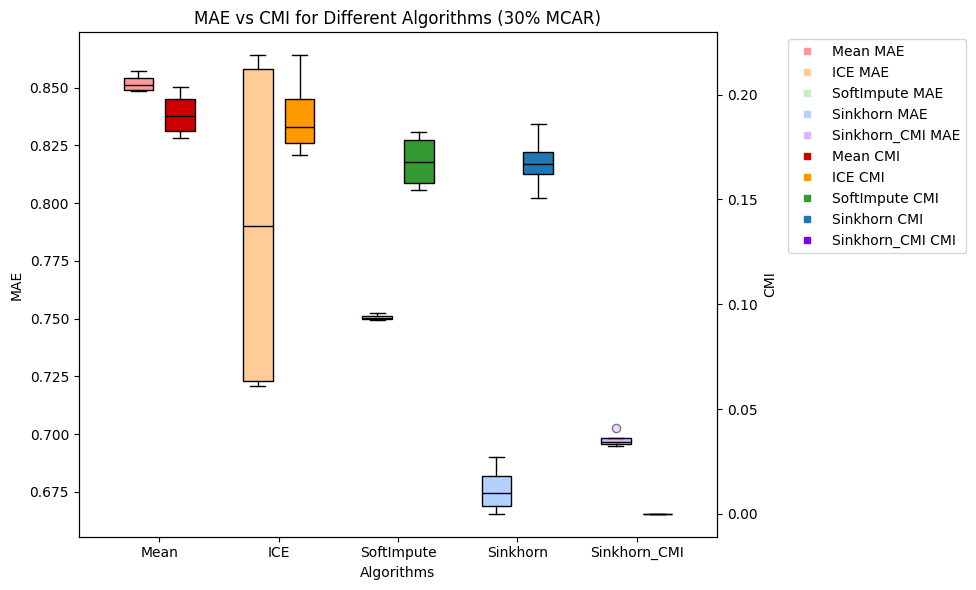

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar30 = {
    'Mean': mnar_mean_cmi30,
    'ICE': mnar_ice_cmi30,
    'SoftImpute': mnar_soft_cmi30,
    'Sinkhorn': mnar_sk_cmi30,
    'Sinkhorn_CMI': mnar_skCmi_cmi30
}
mae_data_mnar30 = {
    'Mean': mnar_mean_mae30,
    'ICE': mnar_ice_mae30,
    'SoftImpute': mnar_soft_mae30,
    'Sinkhorn': mnar_sk_mae30,
    'Sinkhorn_CMI': mnar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar30[algo]
    cmi_vals = cmi_data_mnar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


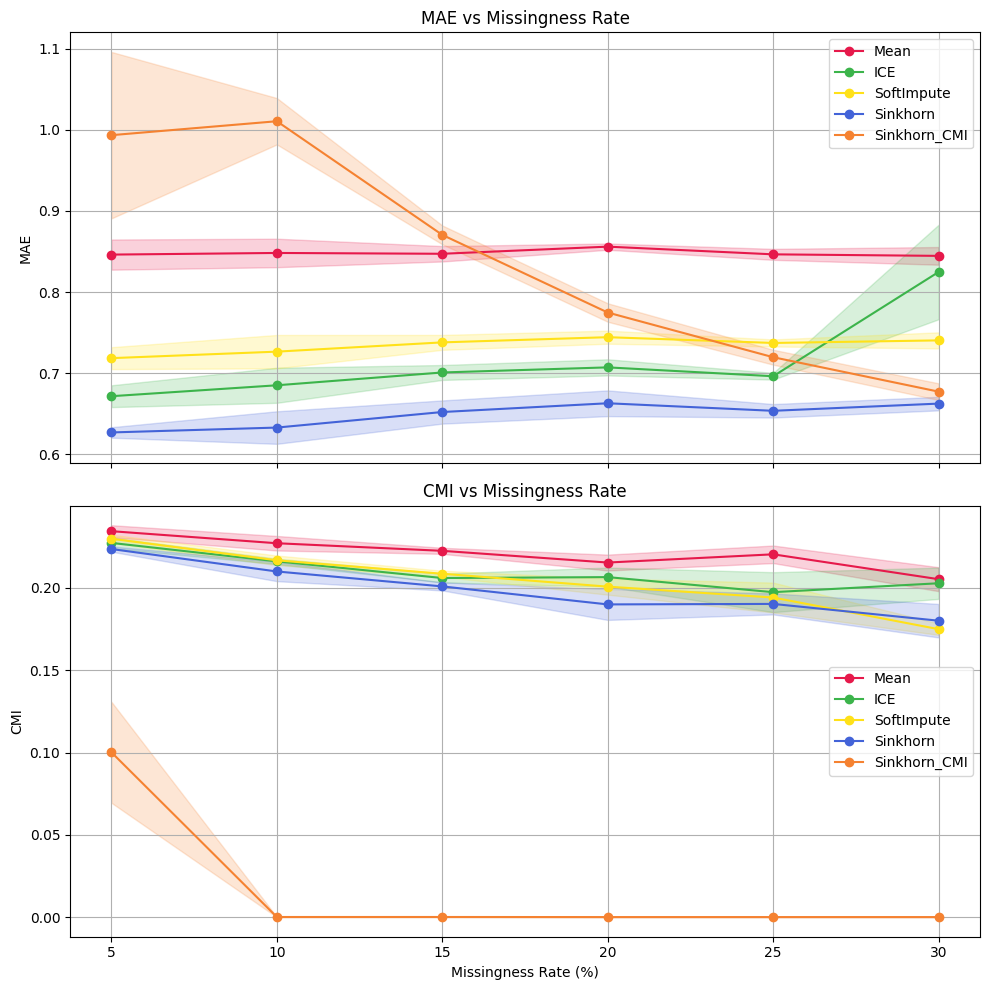

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mnar_mean_mae5, mnar_mean_mae10, mnar_mean_mae15, mnar_mean_mae20, mnar_mean_mae25, mnar_mean_mae30],
    'ICE': [mnar_ice_mae5, mnar_ice_mae10, mnar_ice_mae15, mnar_ice_mae20, mnar_ice_mae25, mnar_ice_mae30],
    'SoftImpute': [mnar_soft_mae5, mnar_soft_mae10, mnar_soft_mae15, mnar_soft_mae20, mnar_soft_mae25, mnar_soft_mae30],
    'Sinkhorn': [mnar_sk_mae5, mnar_sk_mae10, mnar_sk_mae15, mnar_sk_mae20, mnar_sk_mae25, mnar_sk_mae30],
    'Sinkhorn_CMI': [mnar_skCmi_mae5, mnar_skCmi_mae10, mnar_skCmi_mae15, mnar_skCmi_mae20, mnar_skCmi_mae25, mnar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mnar_mean_cmi5, mnar_mean_cmi10, mnar_mean_cmi15, mnar_mean_cmi20, mnar_mean_cmi25, mnar_mean_cmi30],
    'ICE': [mnar_ice_cmi5, mnar_ice_cmi10, mnar_ice_cmi15, mnar_ice_cmi20, mnar_ice_cmi25, mnar_ice_cmi30],
    'SoftImpute': [mnar_soft_cmi5, mnar_soft_cmi10, mnar_soft_cmi15, mnar_soft_cmi20, mnar_soft_cmi25, mnar_soft_cmi30],
    'Sinkhorn': [mnar_sk_cmi5, mnar_sk_cmi10, mnar_sk_cmi15, mnar_sk_cmi20, mnar_sk_cmi25, mnar_sk_cmi30],
    'Sinkhorn_CMI': [mnar_skCmi_cmi5, mnar_skCmi_cmi10, mnar_skCmi_cmi15, mnar_skCmi_cmi20, mnar_skCmi_cmi25, mnar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()
